# **TASK 1: IRIS FLOWER CLASSIFICATION**

**Question ??? .....
*Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.
Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from here for the task of iris flower classification with Machine Learning.***

**1. Imports:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA  # Import PCA
from sklearn.manifold import TSNE  # Import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Preprocessing from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Learnings why we use the things**

1. pandas (pd): This library is essential for working with data in a structured way (like tables). Imagine it as your toolbox for organizing and analyzing data.

2. numpy (np): This library is used for working with numbers and arrays, providing powerful tools for mathematical operations.

3. sklearn.model_selection: This module contains tools for splitting data into training and testing sets (train_test_split) and for systematically searching for the best model parameters (GridSearchCV).

4. sklearn.preprocessing: This module contains tools to prepare your data before feeding it to a machine learning model. We'll use StandardScaler to make sure all features have similar scales, and LabelEncoder to convert categorical labels (like "Iris-setosa") into numbers (like 0, 1, 2).

5. sklearn.metrics: This module provides functions to measure how well your model performs, such as accuracy_score and confusion_matrix.

6. sklearn.neighbors: This module contains the KNeighborsClassifier class, which is the core of our machine learning model.

7. sklearn.decomposition (PCA): We'll use PCA for dimensionality reduction, which can make the model faster and more robust.

8. sklearn.manifold (TSNE): TSNE is another dimensionality reduction technique, but it's more focused on preserving the relationships between data points.

9. matplotlib.pyplot (plt): This library helps us create plots and visualizations to understand our data and the model's performance.

10. seaborn (sns): Seaborn makes it easier to create beautiful and informative statistical plots, making it a great companion for matplotlib.

11. google.colab.drive: This is specifically for Google Colab, a cloud-based environment for running Python code. It allows you to access files from your Google Drive.

**2. Data Loading and Preprocessing:**

In [ ]:
# Replace with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Dataset/Iris.csv'
iris_data = pd.read_csv(file_path)
iris_data.rename(columns={'PetalWidtł': 'PetalWidth'}, inplace=True)

X = iris_data.drop(['Id', 'Species'], axis=1)
y = iris_data['Species']

# Encode the target variable 'y'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

**Learning what and how we use the things**


1.	file_path = '/content/drive/MyDrive/Dataset/Iris.csv': This line sets the path to your Iris dataset file. If you're not using Google Colab, you'll need to change this to the correct path on your computer.
2.	iris_data = pd.read_csv(file_path): This reads the Iris dataset from the CSV file into a pandas DataFrame, which is like a spreadsheet-like structure for your data.
3.	iris_data.rename(columns={'PetalWidtł': 'PetalWidth'}, inplace=True): This line fixes a potential typo ("PetalWidtł" should be "PetalWidth") by renaming the column.
4.	X = iris_data.drop(['Id', 'Species'], axis=1): We're separating the data into features (X) and the target (y). Here, X contains the measurements like sepal length, sepal width, etc., which we'll use to predict the species. We drop the 'Id' and 'Species' columns since they are not useful for training the model.
5.	y = iris_data['Species']: This line stores the species labels (our target variable) in the y variable.
6.	label_encoder = LabelEncoder(): We create a LabelEncoder object. It's like a translator that converts text labels (e.g., "Iris-setosa") into numbers (e.g., 0).
7.	y_encoded = label_encoder.fit_transform(y): This line actually does the translation, converting the species labels into numerical values.
8.	scaler = StandardScaler(): This creates a StandardScaler object. It will help us make all the features have similar scales. Imagine if some features are measured in centimeters and others in meters; this can cause problems for our model.
9.	X = scaler.fit_transform(X): This line scales the features using StandardScaler.
10.	X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42): This divides the data into a training set (to train our model) and a testing set (to evaluate how well our model generalizes to unseen data).
a.	test_size=0.2: This means 20% of the data will be used for testing.
b.	random_state=42: This makes the splitting deterministic, so you'll always get the same split if you run the code again.



**3. K-Nearest Neighbors (KNN)**

In [ ]:
# --- K-Nearest Neighbors (KNN) ---
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
best_knn = knn_grid_search.best_estimator_

y_pred_knn = best_knn.predict(X_test)

**Learning what and how we use the things**


1.	knn_model = KNeighborsClassifier(): This creates a KNN model object. The KNN algorithm works by looking at the nearest neighbors of a new data point and using their labels to predict the new point's label.
2.	knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}: This defines a range of n_neighbors values we want to try. The n_neighbors parameter controls how many neighbors we consider.
3.	knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy'): This is the Grid Search part. It systematically tries out different n_neighbors values, evaluates their performance using cross-validation (CV), and finds the best one based on accuracy.
a.	cv=5: We'll split the training data into 5 folds and use each fold as a test set while training on the remaining folds. This is to avoid overfitting to one specific split of the data.
b.	scoring='accuracy': We're trying to maximize the accuracy (percentage of correct predictions).
4.	knn_grid_search.fit(X_train, y_train): This trains the KNN model on the training data, searching for the best n_neighbors value.
5.	best_knn = knn_grid_search.best_estimator_: This stores the best KNN model (the one with the highest accuracy) in the best_knn variable.
6.	y_pred_knn = best_knn.predict(X_test): This uses the best KNN model to make predictions on the test data, and stores those predictions in y_pred_knn.


**4. Output and Visualization:**


--- K-Nearest Neighbors ---
Best Parameters: {'n_neighbors': 3}
Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


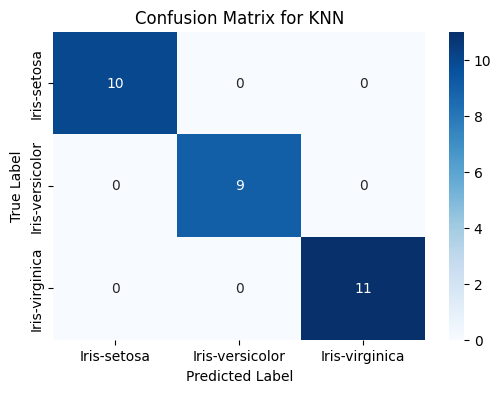

In [ ]:
# --- Output and Visualization ---
print(f"\n--- K-Nearest Neighbors ---")
print(f"Best Parameters: {knn_grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,  # Use label_encoder.classes_
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()


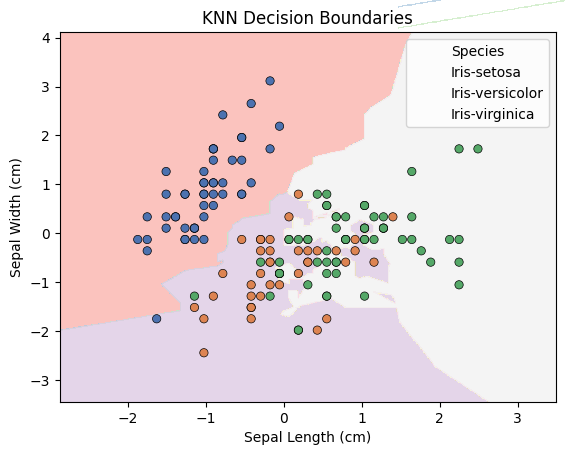

In [ ]:
# 2. Decision Boundary Visualization (Using only 2 features)
X_2d = X[:, :2]
knn_2d = KNeighborsClassifier(**knn_grid_search.best_params_)
knn_2d.fit(X_2d, y_encoded)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='Pastel1')
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_encoded, palette='deep', edgecolor='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KNN Decision Boundaries')
plt.legend(title='Species', labels=label_encoder.classes_)
plt.show()


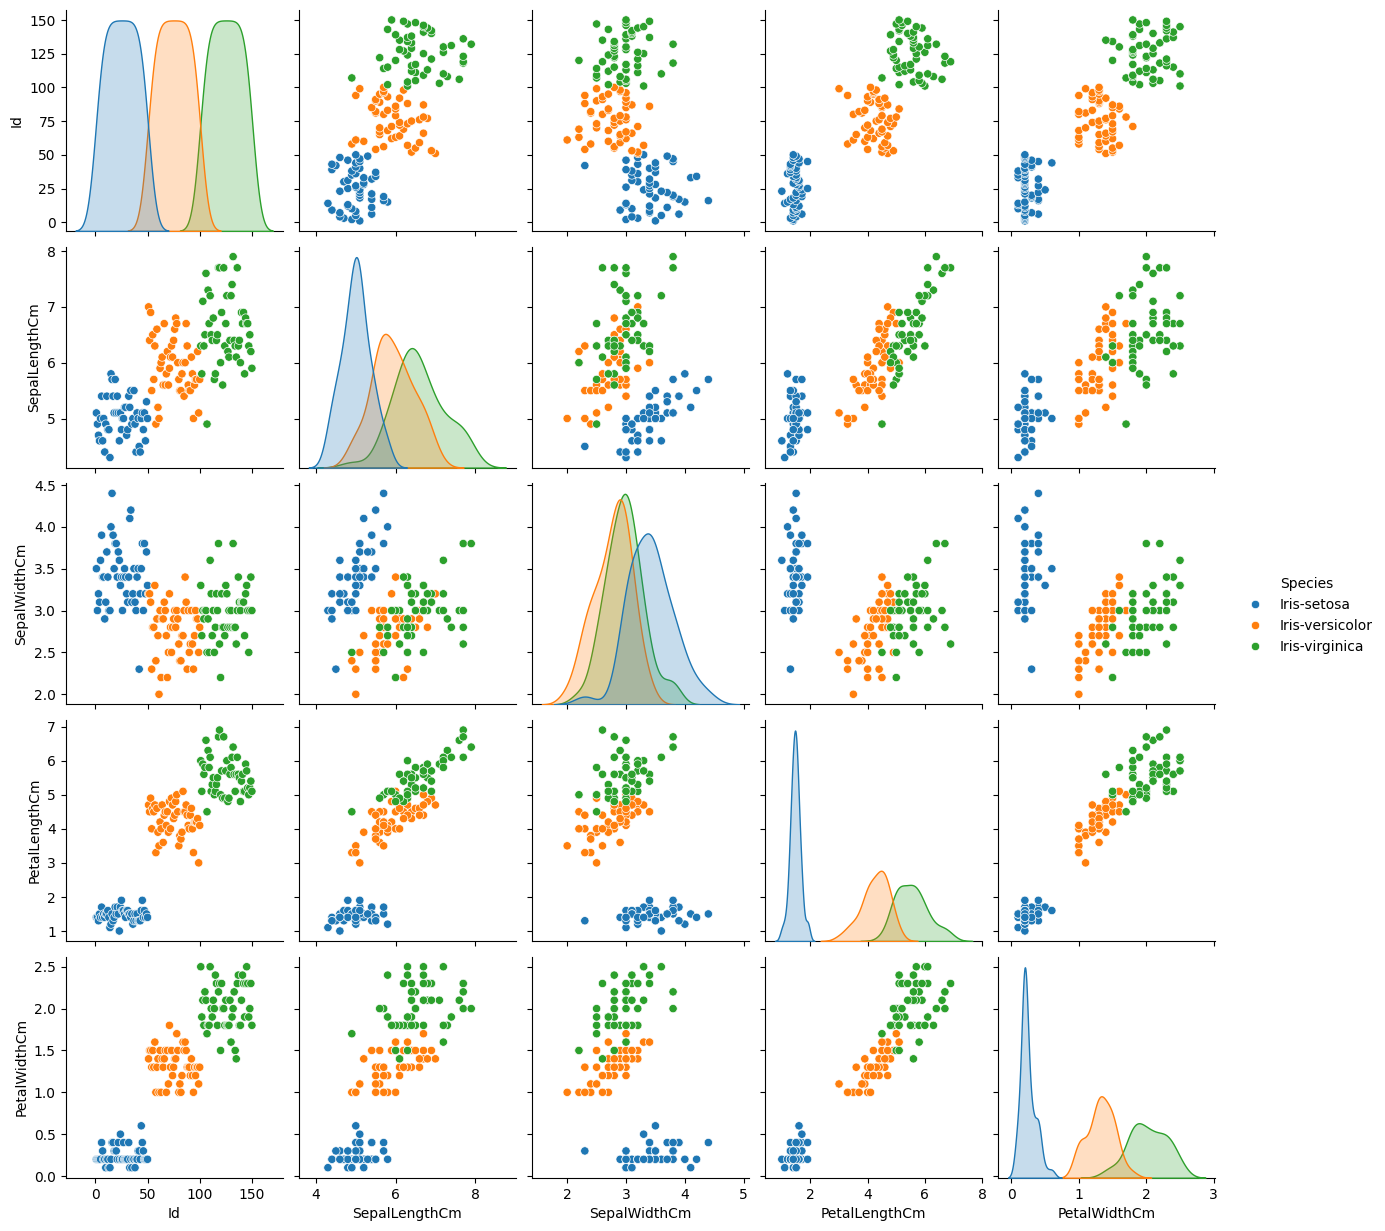

In [ ]:
# Pair plot with species color-coding
sns.pairplot(iris_data, hue='Species', diag_kind='kde')
plt.show()

**Learning what and how we use the things**


1.	print(f"\n--- K-Nearest Neighbors ---"): This simply prints a heading for the output.
2.	print(f"Best Parameters: {knn_grid_search.best_params_}"): This prints the best n_neighbors value found by Grid Search.
3.	print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}"): This prints the accuracy of the best KNN model on the test data, formatted to two decimal places.
4.	print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn)): This prints the confusion matrix, which shows how many predictions were made correctly and incorrectly for each species.
5.	sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_): This creates a heatmap visualization of the confusion matrix.
a.	annot=True: Adds the numbers to each cell.
b.	fmt="d": Formats the numbers as integers.
c.	cmap="Blues": Uses a blue colormap.
d.	xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_: Uses the original species names as labels for the axes.
6.	plt.figure(figsize=(6, 4)): Creates a figure with a specific size.
7.	plt.xlabel('Predicted Label'), plt.ylabel('True Label'), plt.title('Confusion Matrix for KNN'): Adds labels and a title to the plot.
8.	plt.show(): Displays the plot.
9.	Decision Boundary Visualization: This section creates a visualization to understand how the KNN model makes decisions in a 2D space.
a.	X_2d = X[:, :2]: Uses only the first two features (sepal length and sepal width) for the visualization.
b.	knn_2d = KNeighborsClassifier(**knn_grid_search.best_params_): Creates a new KNN model, but this time using only the best n_neighbors value found by Grid Search.
c.	knn_2d.fit(X_2d, y_encoded): Trains the 2D KNN model.
d.	x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1: Defines the limits of the x-axis for the plot.
e.	y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1: Defines the limits of the y-axis.
f.	xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)): Creates a grid of points covering the x-y space.
g.	Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]): Makes predictions for each point in the grid using the 2D KNN model.
h.	Z = Z.reshape(xx.shape): Reshapes the predictions into the same shape as the grid.
i.	plt.contourf(xx, yy, Z, alpha=0.8, cmap='Pastel1'): Creates a contour plot to show the decision regions.
j.	sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_encoded, palette='deep', edgecolor='k'): Plots the actual data points, colored by species.
k.	plt.xlabel('Sepal Length (cm)'), plt.ylabel('Sepal Width (cm)'), plt.title('KNN Decision Boundaries'): Adds labels and a title to the plot.
l.	plt.legend(title='Species', labels=label_encoder.classes_): Adds a legend to identify the species colors.
10.	sns.pairplot(iris_data, hue='Species', diag_kind='kde'): Creates a pair plot to visualize relationships between all pairs of features.
a.	hue='Species': Colors the points by species.
b.	diag_kind='kde': Plots kernel density estimates along the diagonal.
11.	plt.show(): Displays the plot.



**OutPut ScreenShots**





**1st. Confusion Matrix for KNN**

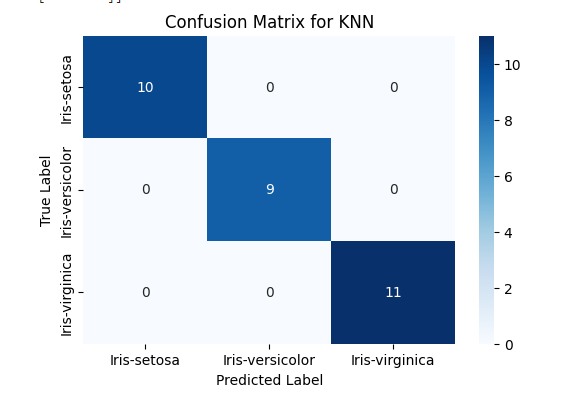



**2nd. KNN Decision Boundaries**


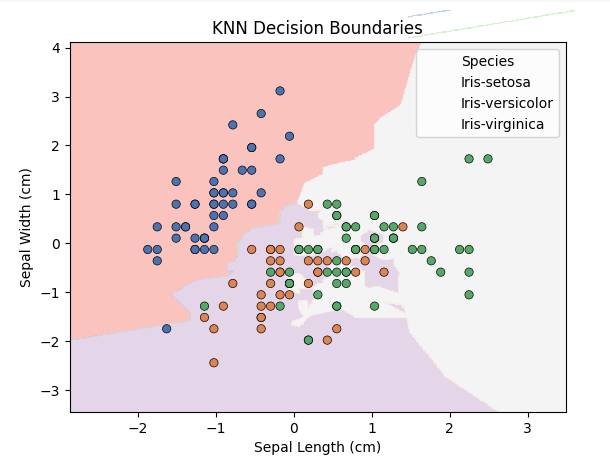


**FULL CODE**

---



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- K-Nearest Neighbors ---
Best Parameters: {'n_neighbors': 3}
Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


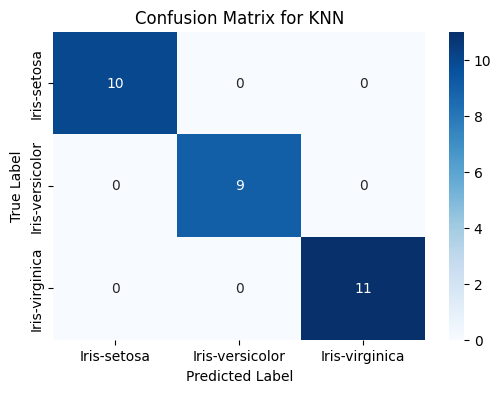

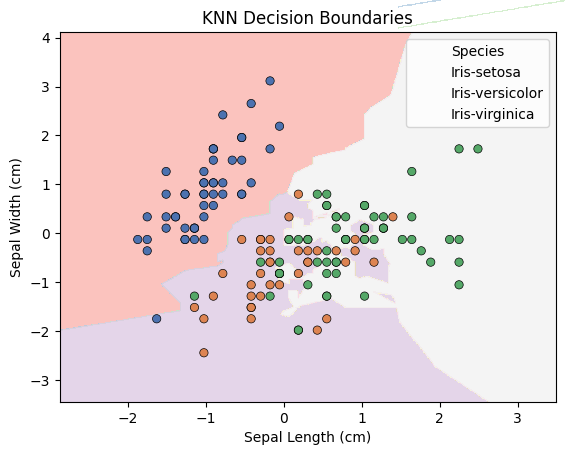

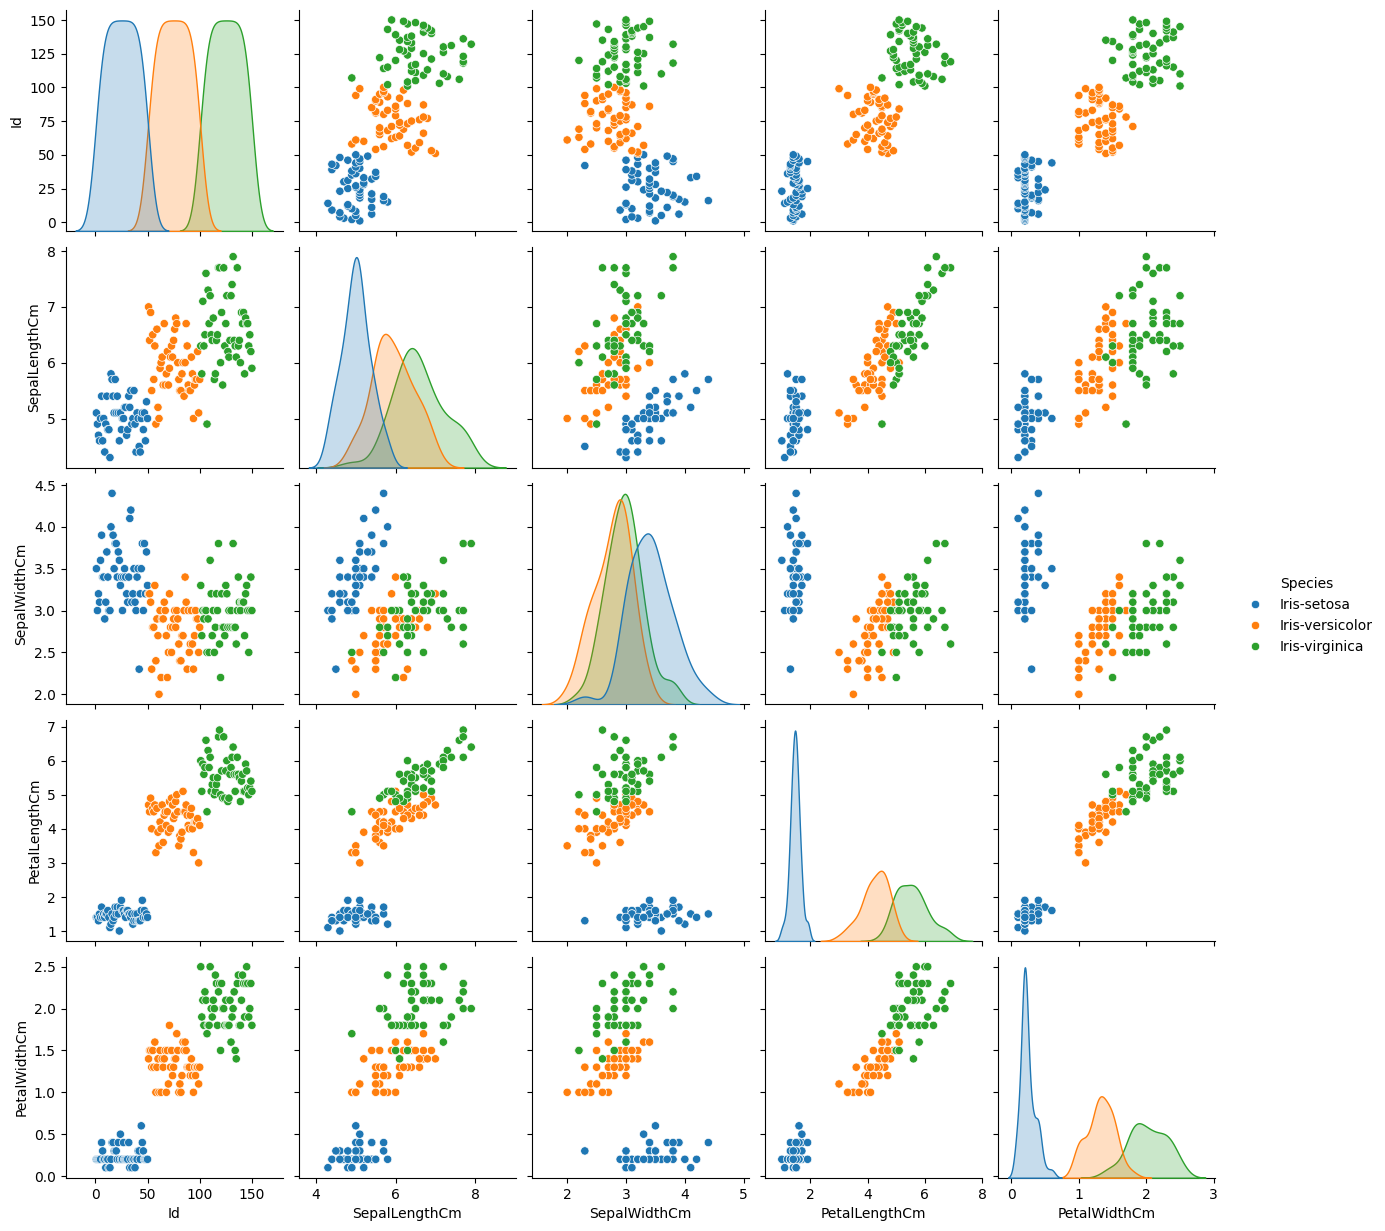

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA  # Import PCA
from sklearn.manifold import TSNE  # Import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Replace with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Dataset/Iris.csv'
iris_data = pd.read_csv(file_path)
iris_data.rename(columns={'PetalWidtł': 'PetalWidth'}, inplace=True)

X = iris_data.drop(['Id', 'Species'], axis=1)
y = iris_data['Species']

# Encode the target variable 'y'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# --- K-Nearest Neighbors (KNN) ---
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
best_knn = knn_grid_search.best_estimator_

y_pred_knn = best_knn.predict(X_test)

# --- Output and Visualization ---
print(f"\n--- K-Nearest Neighbors ---")
print(f"Best Parameters: {knn_grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,  # Use label_encoder.classes_
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

# 2. Decision Boundary Visualization (Using only 2 features)
X_2d = X[:, :2]
knn_2d = KNeighborsClassifier(**knn_grid_search.best_params_)
knn_2d.fit(X_2d, y_encoded)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='Pastel1')
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_encoded, palette='deep', edgecolor='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KNN Decision Boundaries')
plt.legend(title='Species', labels=label_encoder.classes_)
plt.show()


# Pair plot with species color-coding
sns.pairplot(iris_data, hue='Species', diag_kind='kde')
plt.show()


***End of 1 st task***





---



# **TASK 2:UNEMPLOYMENT ANALYSIS WITH PYTHON**

**Question ??? .....
*Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.***

**1. Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


**Import Libraries**

1.	pandas: The foundation for data manipulation. It allows you to read CSV files (like your unemployment data), clean data, perform calculations, and organize data into tables (DataFrames).
2.	matplotlib.pyplot: Used for basic plotting. It helps you visualize data through line plots, histograms, scatter plots, and more.
3.	seaborn: Provides a higher-level interface to matplotlib for creating visually appealing and informative plots. It simplifies tasks like customizing colors, styles, and annotations.
4.	sklearn.model_selection: Essential for splitting your data into training and testing sets. This ensures you can train your models on one part of the data and evaluate their performance on unseen data.
5.	sklearn.linear_model: Contains algorithms for linear regression, which tries to find a linear relationship between your input features and the target variable (unemployment rate).
6.	sklearn.tree: Holds the decision tree algorithm. Decision trees make predictions by splitting the data based on specific features, creating a tree-like structure.
7.	sklearn.ensemble: Provides more advanced algorithms like random forests. Random forests combine multiple decision trees to make predictions, which can lead to better accuracy.
8.	sklearn.metrics: Provides functions to measure how well your trained models perform. It calculates metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared to assess prediction accuracy.
9.	google.colab: Used if you're working in Google Colab to access files from your Google Drive.



**2. Data Loading and Preprocessing**

In [ ]:
# --- Data Loading and Preprocessing ---
from google.colab import drive
drive.mount('/content/drive')

# Replace with the actual path to your CSV file
file_pathone = '/content/drive/MyDrive/Dataset/Unemployment_in_India.csv'
file_pathtwo = '/content/drive/MyDrive/Dataset/Unemployment_Rate_upto_11_2020.csv'

# Load the datasets
df1 = pd.read_csv(file_pathone)
df2 = pd.read_csv(file_pathtwo)

# Data Exploration and Cleaning
# Display basic information and first few rows of each dataset
print(df1.info())
print(df1.head())
print(df2.info())
print(df2.head())

# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())

# Handle missing values (if any) - for simplicity, dropping rows with missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# Feature Engineering

# Remove leading spaces from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Strip leading/trailing spaces from the 'Date' column in both dataframes
df1['Date'] = df1['Date'].str.strip()
df2['Date'] = df2['Date'].str.strip()

# Convert 'Date' column to datetime objects
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')

# Extract month and year from 'Date' for potential seasonality analysis
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
           Region         Date  Frequency   Estimated Unemployment Rat



**Data Loading and Preprocessing**

1.	Mount Google Drive: If using Google Colab, this step makes your Google Drive files accessible within the Colab environment.
2.	Define File Paths: You provide the location of your CSV files, which contain the unemployment data.
3.	Load Datasets: pd.read_csv() reads the CSV files and creates pandas DataFrames for easy manipulation.
4.	Data Exploration:
o	df.info() shows you the data types of each column, number of non-null values, and memory usage.
o	df.head() displays the first few rows of your DataFrame, giving you a quick overview of the data.
5.	Handle Missing Values: Real-world data often has missing entries.
o	df.isnull().sum() tells you how many missing values are in each column.
o	df.dropna(inplace=True) removes rows with missing values. This is a simple approach; more advanced methods exist for dealing with missing data.
6.	Feature Engineering: This is about transforming your data to make it more suitable for modeling.
o	Removing Spaces: Cleaning up column names by removing leading/trailing spaces.
o	Converting to Datetime: Transforming the 'Date' column into a datetime format. This allows you to work with dates and perform date-related calculations.
o	Extracting Month and Year: Creating new columns 'Month' and 'Year' to capture possible seasonal patterns in unemployment.


**3.Data Visualization**

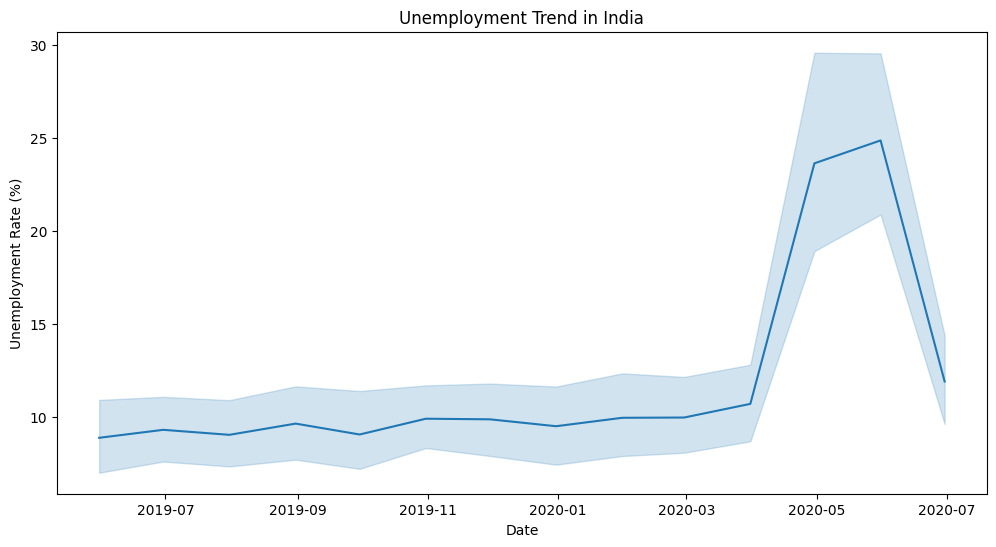

In [ ]:
# Data Visualization 1-7

# 1. Unemployment Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df1) # Removed extra spaces around column name
plt.title("Unemployment Trend in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

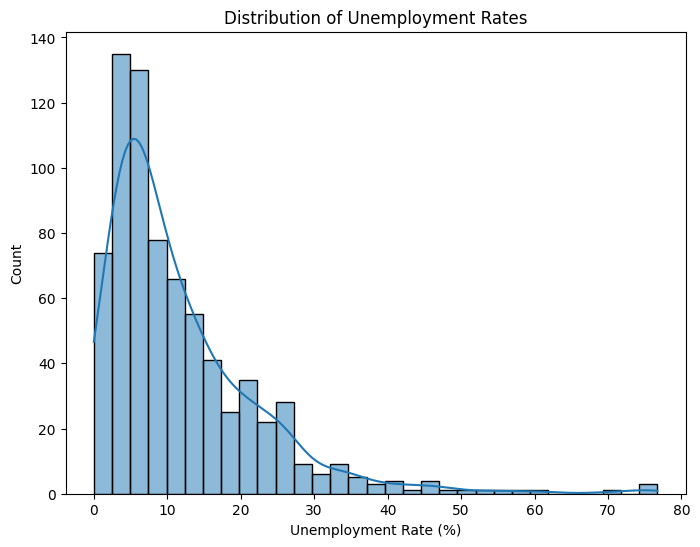

In [ ]:

# 2. Unemployment Rate Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df1['Estimated Unemployment Rate (%)'], kde=True) # Removed extra spaces around column name
plt.title("Distribution of Unemployment Rates")
plt.xlabel("Unemployment Rate (%)")
plt.show()


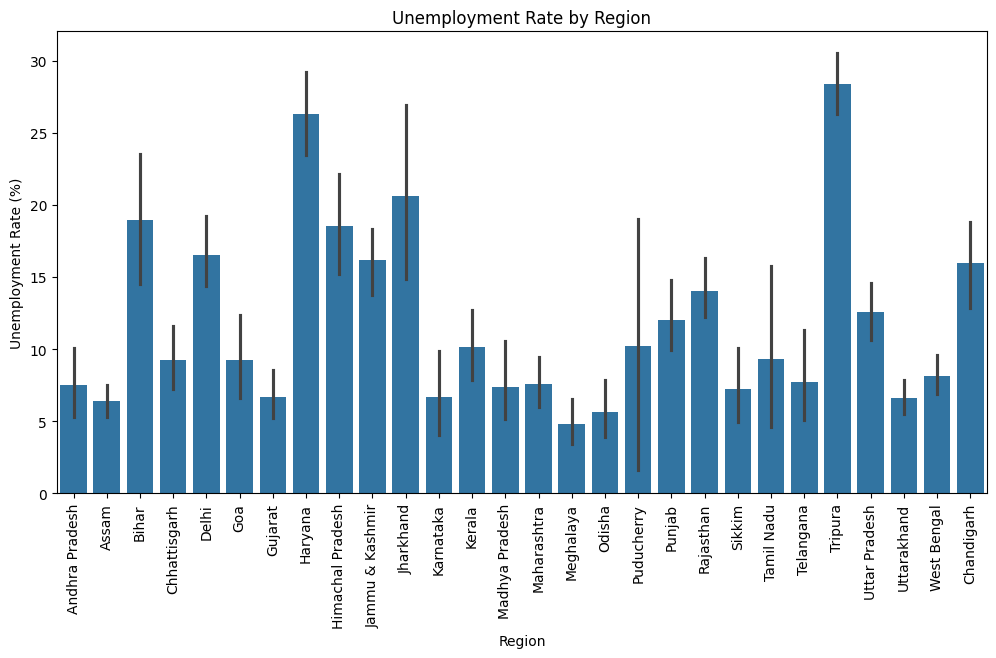

In [ ]:
# 3. Unemployment by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1) # Removed extra spaces around column name
plt.title("Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()

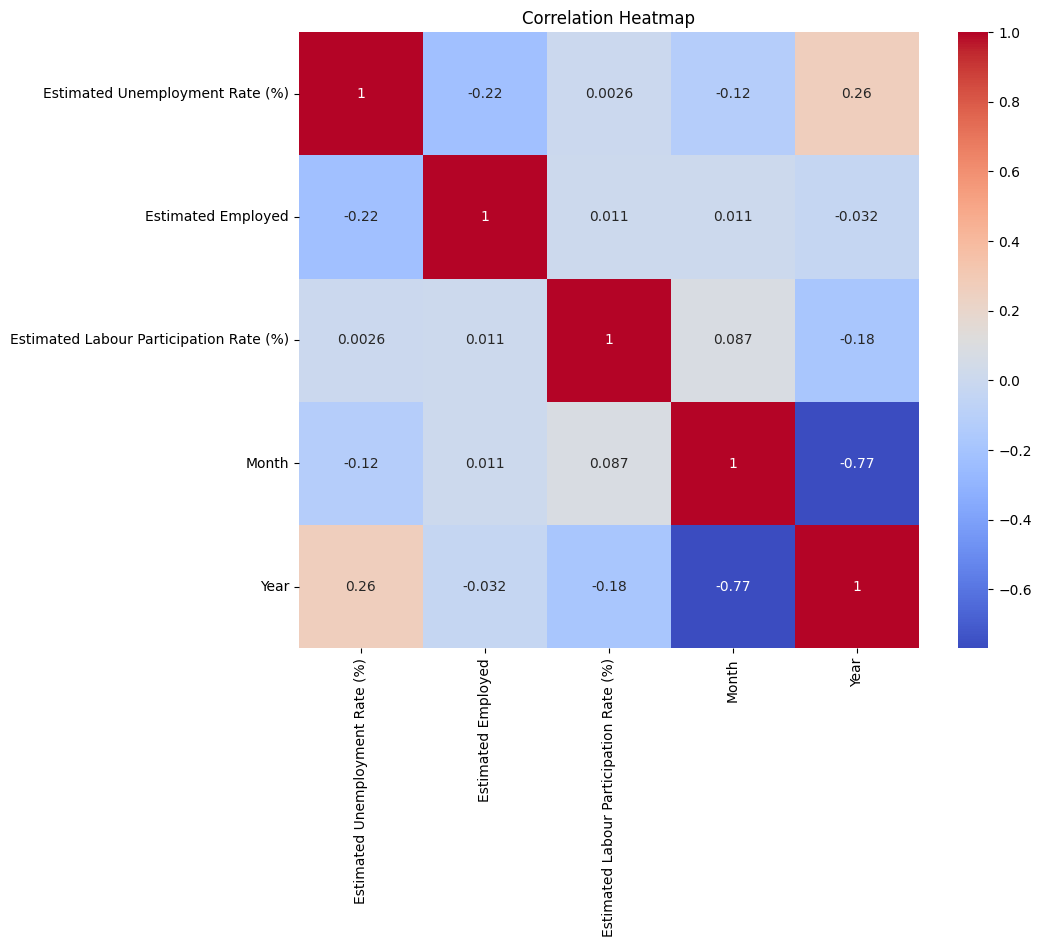

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation calculation
numerical_df = df1.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

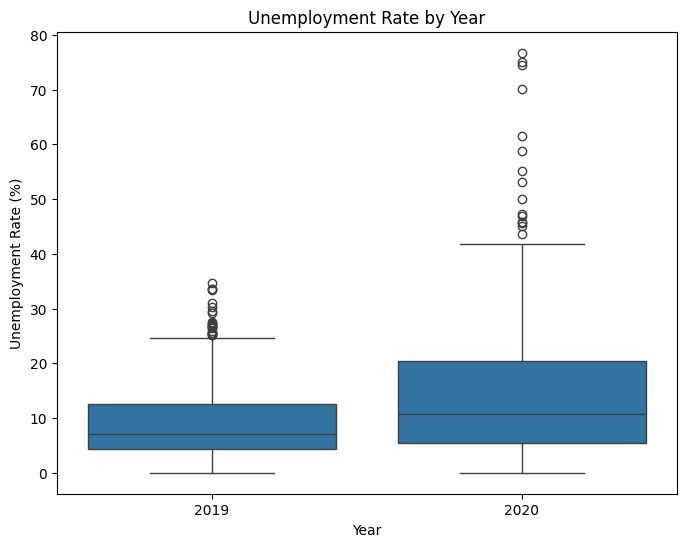

In [ ]:
# 6.  Unemployment Rate by Year (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Estimated Unemployment Rate (%)', data=df1)
plt.title("Unemployment Rate by Year")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

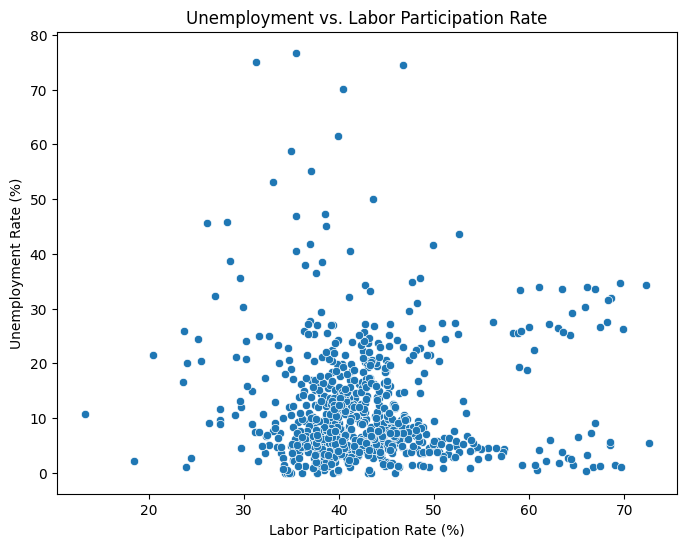

In [ ]:
# 7. Scatter Plot: Unemployment vs. Labor Participation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', data=df1)
plt.title("Unemployment vs. Labor Participation Rate")
plt.xlabel("Labor Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()



**Data Visualization**

1.	Unemployment Trend Over Time: Using a line plot (sns.lineplot()) helps you see the overall trend in unemployment over time.
2.	Unemployment Rate Distribution: A histogram (sns.histplot()) shows how frequently different unemployment rates occur.
3.	Unemployment by Region: A bar plot (sns.barplot()) lets you compare unemployment rates across different regions.
4.	Correlation Heatmap: The heatmap (sns.heatmap()) visualizes correlations between your features. Strong correlations suggest relationships between variables, which can be helpful for model building.
5.	Unemployment Rate by Year: A box plot (sns.boxplot()) provides insights into the distribution of unemployment rates for different years.
6.	Scatter Plot: The scatter plot shows the relationship between the unemployment rate and the labor participation rate.


**4. Model Building**

In [ ]:
# Model Building (Using df1 as an example, you can repeat for df2)
# Select features and target variable
X = df1[['Month', 'Year', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = df1['Estimated Unemployment Rate (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# 2. Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# 3. Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)


 **Model Building**

1.	Select Features and Target Variable: You decide which columns from your DataFrame will be used as input features (like 'Month', 'Year', etc.) to predict the target variable, which is the 'Estimated Unemployment Rate (%)'.
2.	Split Data: train_test_split() divides your data into two parts:
o	Training Data: Used to train your models (learn patterns from the data).
o	Testing Data: Used to evaluate how well your trained models perform on unseen data.
3.	Train Models: You build and train different regression models:
o	Linear Regression: Assumes a linear relationship between your features and the target variable.
o	Decision Tree Regression: Creates a tree-like structure to make predictions based on features.
o	Random Forest Regression: Ensembles multiple decision trees to improve prediction accuracy.


**5. Model Evaluation**

In [ ]:
# Model Evaluation
# Create a dictionary to store model results
model_results = {}

# Evaluate each model
for model_name, model, predictions in zip(['Linear Regression', 'Decision Tree', 'Random Forest'],
                                        [linear_model, tree_model, forest_model],
                                        [linear_pred, tree_pred, forest_pred]):
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    model_results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

# Print model evaluation results
for model_name, metrics in model_results.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print()

--- Linear Regression ---
MSE: 123.7006
RMSE: 11.1221
R-squared: 0.1456

--- Decision Tree ---
MSE: 125.4588
RMSE: 11.2008
R-squared: 0.1334

--- Random Forest ---
MSE: 89.9725
RMSE: 9.4854
R-squared: 0.3785




**Model Evaluation**


1.	Predict on Test Data: You use your trained models to make predictions on the test data.
2.	Calculate Metrics: The chosen metrics assess your model's accuracy:
o	Mean Squared Error (MSE): A common metric that measures the average squared difference between actual values and predicted values.
o	Root Mean Squared Error (RMSE): The square root of the MSE, providing an error measure in the same units as your target variable.
o	R-squared: A value between 0 and 1, indicating how well your model fits the data. A higher R-squared value means a better fit.
3.	Store Results: You keep track of the model's performance in a dictionary for easy comparison.
4.	Print Results: The results are presented clearly, allowing you to compare the performance of different models and choose the one that best predicts unemployment rates.


**Out Put Screen Shot**





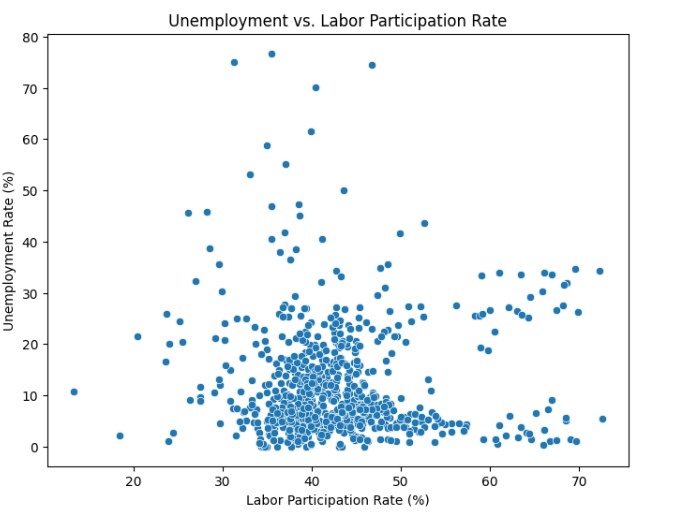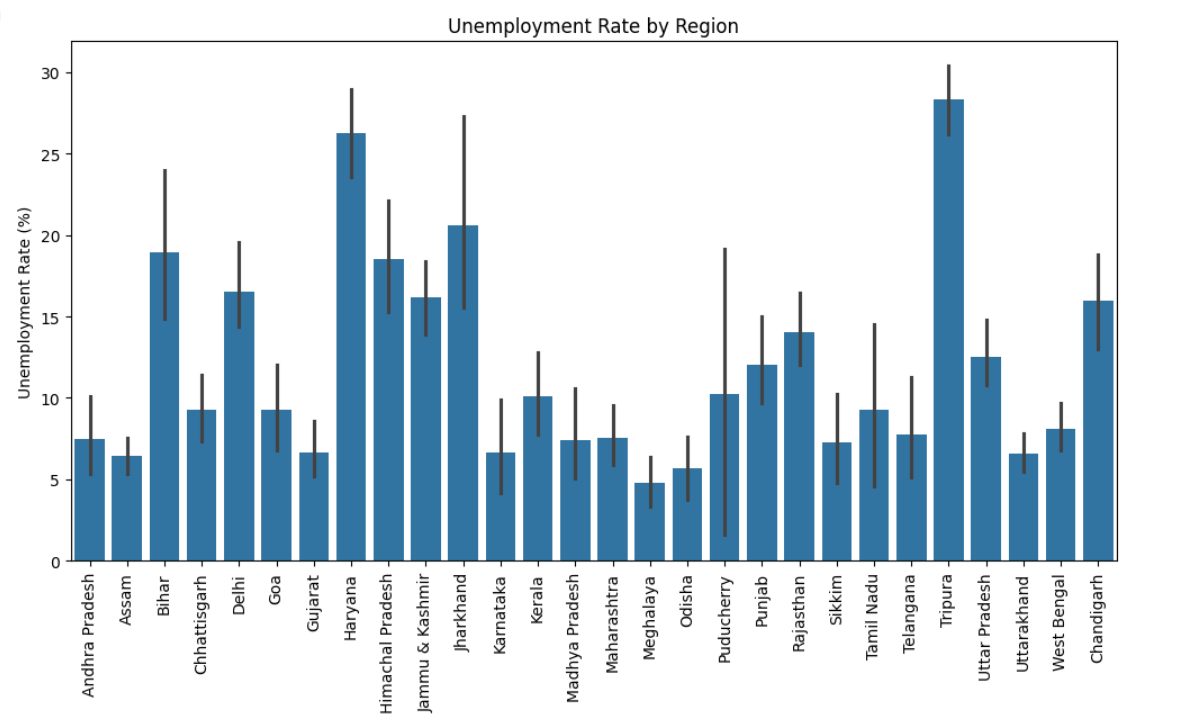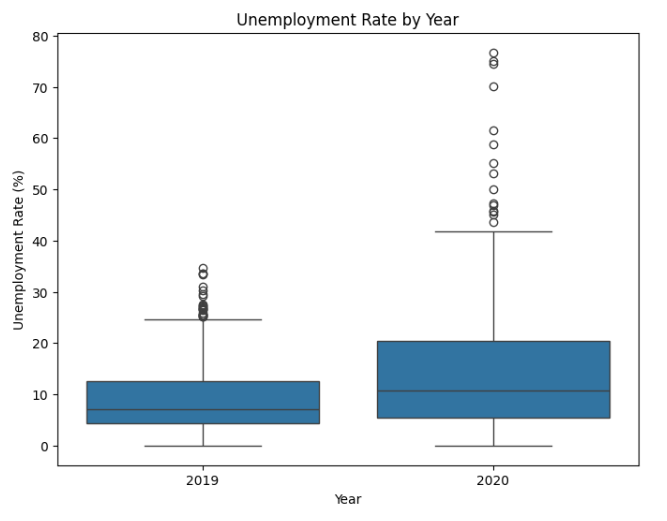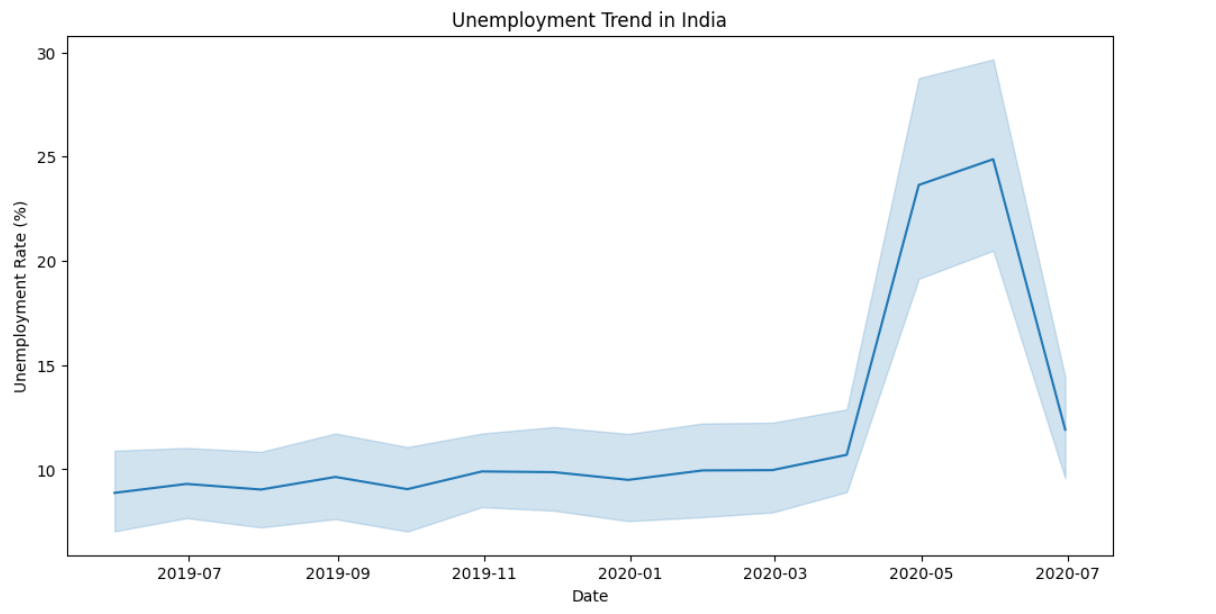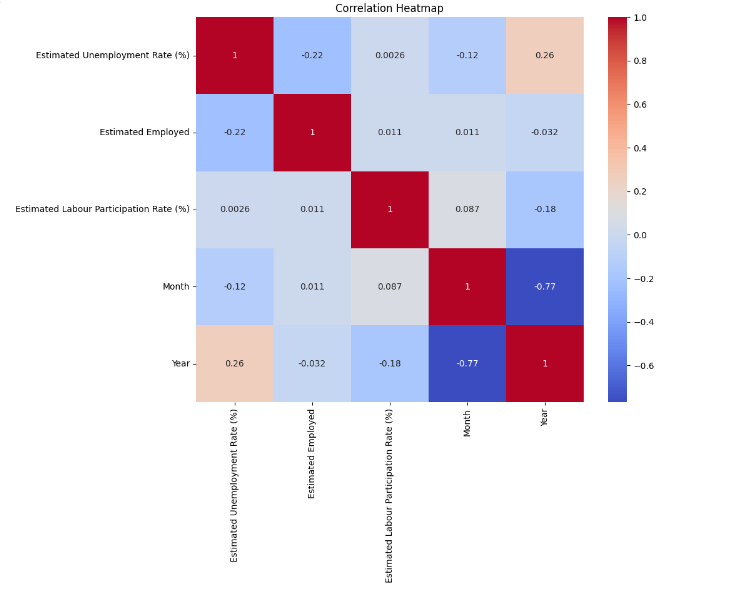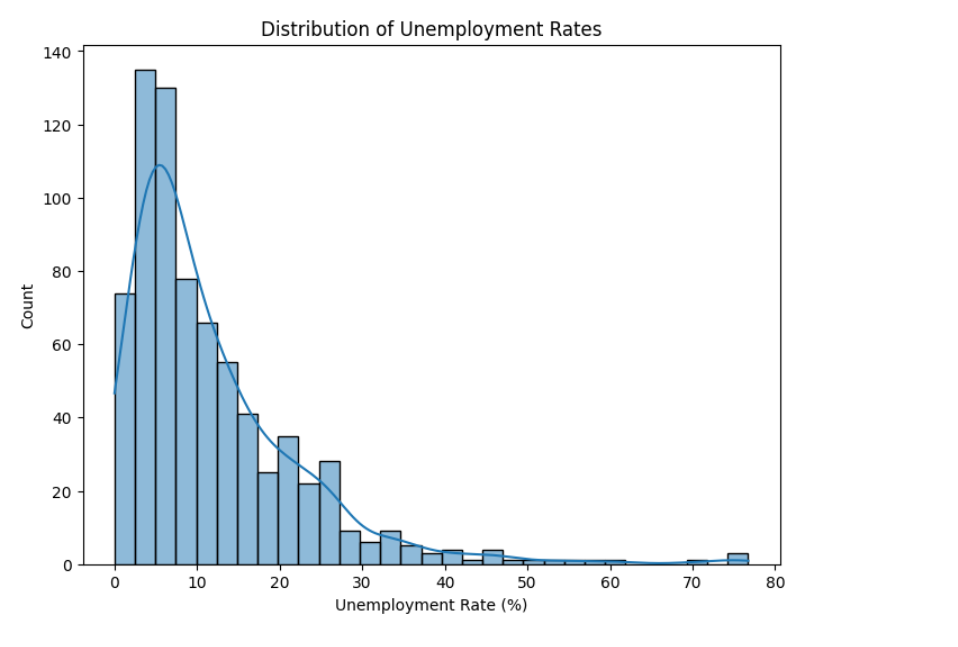

**FULL CODE**

---



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
           Region         Date  Frequency   Estimated Unemployment Rat

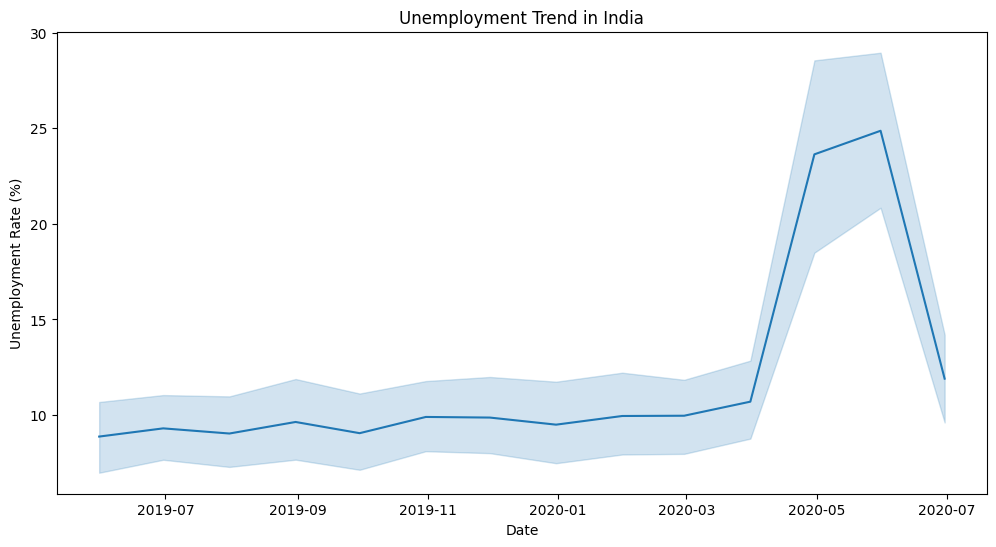

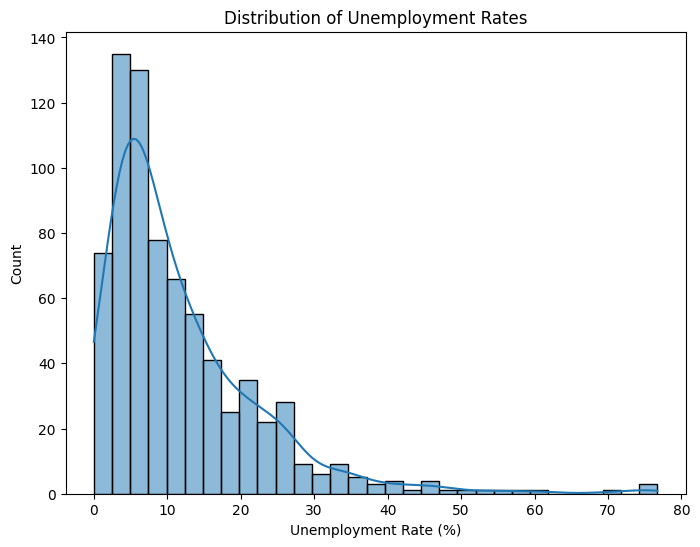

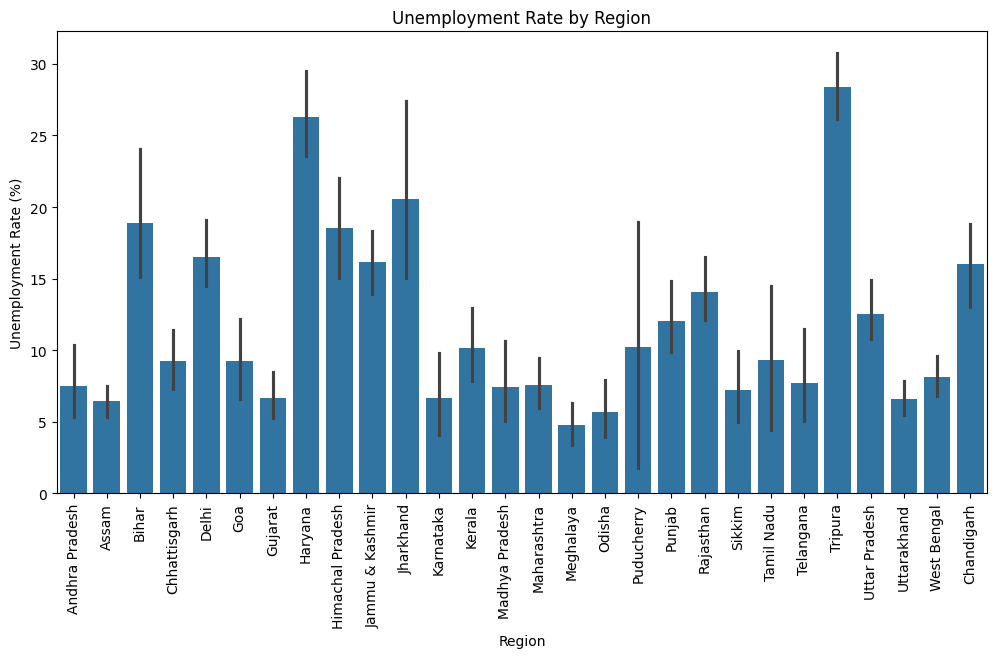

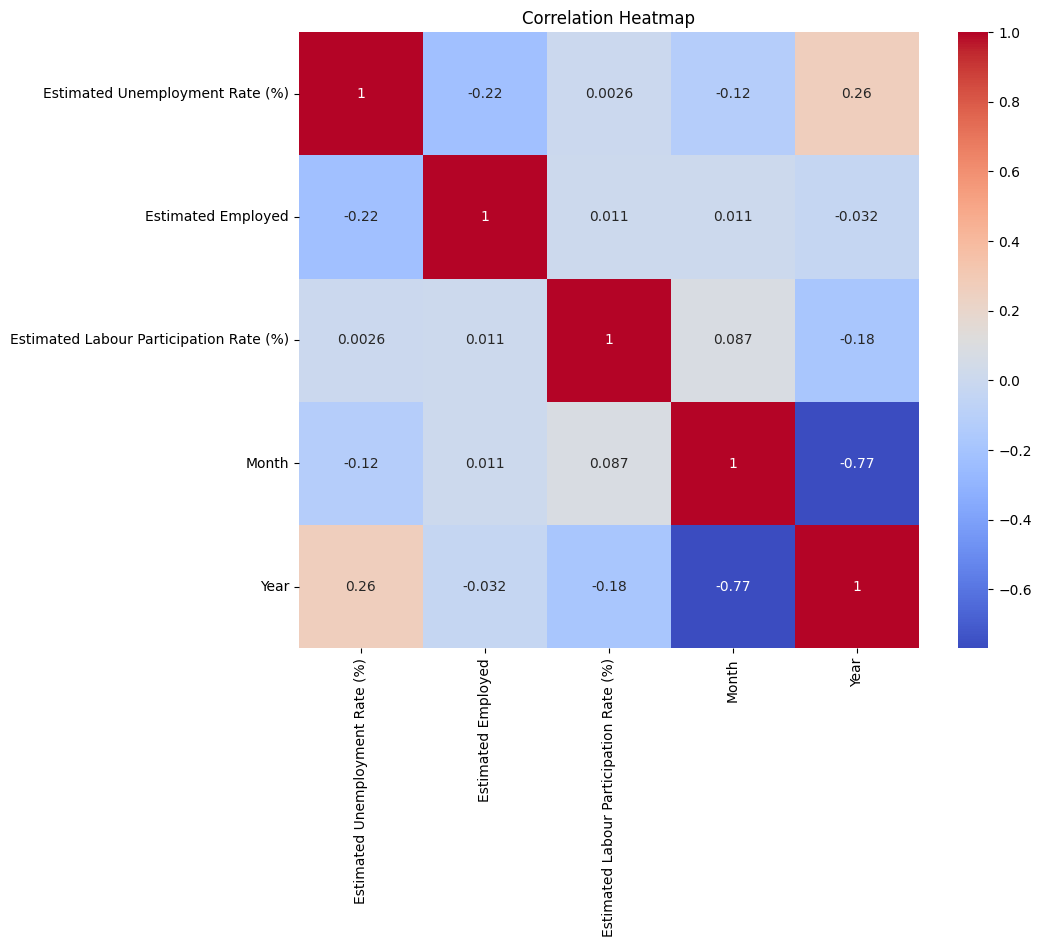

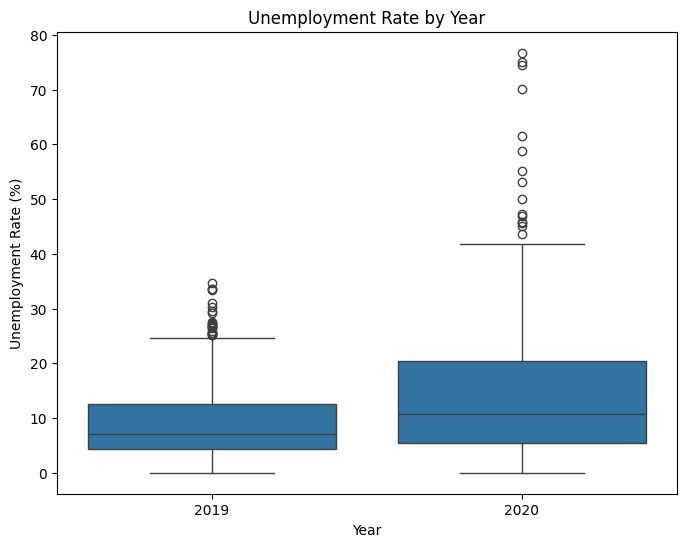

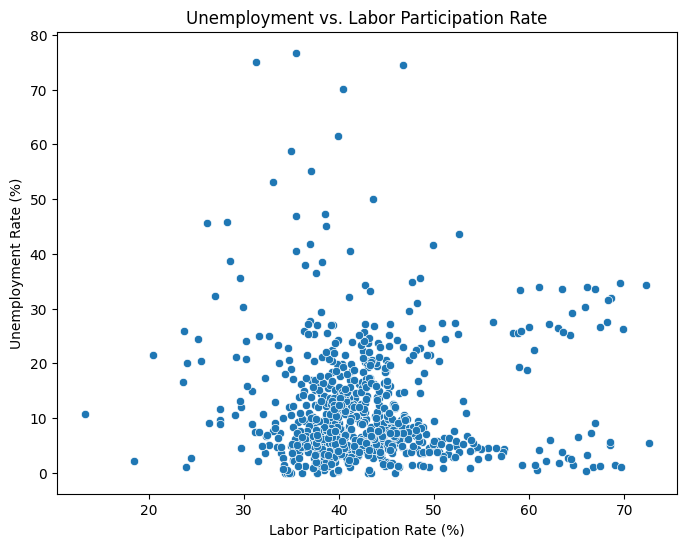

--- Linear Regression ---
MSE: 123.7006
RMSE: 11.1221
R-squared: 0.1456

--- Decision Tree ---
MSE: 126.2545
RMSE: 11.2363
R-squared: 0.1279

--- Random Forest ---
MSE: 85.3015
RMSE: 9.2359
R-squared: 0.4108



In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Loading and Preprocessing ---
from google.colab import drive
drive.mount('/content/drive')

# Replace with the actual path to your CSV file
file_pathone = '/content/drive/MyDrive/Dataset/Unemployment_in_India.csv'
file_pathtwo = '/content/drive/MyDrive/Dataset/Unemployment_Rate_upto_11_2020.csv'

# Load the datasets
df1 = pd.read_csv(file_pathone)
df2 = pd.read_csv(file_pathtwo)

# Data Exploration and Cleaning
# Display basic information and first few rows of each dataset
print(df1.info())
print(df1.head())
print(df2.info())
print(df2.head())

# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())

# Handle missing values (if any) - for simplicity, dropping rows with missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)

# Feature Engineering

# Remove leading spaces from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Strip leading/trailing spaces from the 'Date' column in both dataframes
df1['Date'] = df1['Date'].str.strip()
df2['Date'] = df2['Date'].str.strip()

# Convert 'Date' column to datetime objects
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')

# Extract month and year from 'Date' for potential seasonality analysis
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year


# Data Visualization 1-7

# 1. Unemployment Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df1) # Removed extra spaces around column name
plt.title("Unemployment Trend in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


# 2. Unemployment Rate Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df1['Estimated Unemployment Rate (%)'], kde=True) # Removed extra spaces around column name
plt.title("Distribution of Unemployment Rates")
plt.xlabel("Unemployment Rate (%)")
plt.show()


# 3. Unemployment by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df1) # Removed extra spaces around column name
plt.title("Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation calculation
numerical_df = df1.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 6.  Unemployment Rate by Year (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Estimated Unemployment Rate (%)', data=df1)
plt.title("Unemployment Rate by Year")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# 7. Scatter Plot: Unemployment vs. Labor Participation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', data=df1)
plt.title("Unemployment vs. Labor Participation Rate")
plt.xlabel("Labor Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()


# Model Building (Using df1 as an example, you can repeat for df2)
# Select features and target variable
X = df1[['Month', 'Year', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = df1['Estimated Unemployment Rate (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# 2. Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# 3. Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Model Evaluation
# Create a dictionary to store model results
model_results = {}

# Evaluate each model
for model_name, model, predictions in zip(['Linear Regression', 'Decision Tree', 'Random Forest'],
                                        [linear_model, tree_model, forest_model],
                                        [linear_pred, tree_pred, forest_pred]):
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    model_results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2}

# Print model evaluation results
for model_name, metrics in model_results.items():
    print(f"--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print()

**End of 2nd  task**


---



# **TASK 3:CAR PRICE PREDICTION WITH MACHINE LEARNING**

***Question ??? .....
*The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.**

**1.Explanation of Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Explanation of Imports:**

1.	pandas as pd: Imports the Pandas library, used for data manipulation and analysis.
2.	numpy as np: Imports the NumPy library, used for numerical operations and array manipulation.
3.	matplotlib.pyplot as plt: Imports the Matplotlib library for creating visualizations.
4.	seaborn as sns: Imports the Seaborn library, built on Matplotlib, providing more visually appealing statistical plots.
5.	sklearn.model_selection import train_test_split, GridSearchCV: Imports functions for splitting data into training and testing sets and for performing grid search hyperparameter optimization.
6.	sklearn.preprocessing import LabelEncoder, StandardScaler: Imports functions for encoding categorical features (LabelEncoder) and scaling numerical features (StandardScaler).
7.	sklearn.linear_model import LinearRegression: Imports the Linear Regression model.
8.	sklearn.tree import DecisionTreeRegressor: Imports the Decision Tree Regression model.
9.	sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor: Imports Random Forest and Gradient Boosting models, which are ensemble methods.
10.	sklearn.svm import SVR: Imports Support Vector Regression (SVR).
11.	sklearn.metrics import mean_squared_error, r2_score: Imports metrics for evaluating model performance, specifically mean squared error (MSE) and R-squared.
12.	from google.colab import drive: Used in Google Colab to mount your Google Drive for accessing files.



**2.Data Loading and Exploration:**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/car data.csv')
print(data.head())

print(data.info())  # Check for data types, missing values
print(data.describe()) # Get statistical summary

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

**Data Loading and Exploration:**

1.	data = pd.read_csv('/content/drive/MyDrive/Dataset/car data.csv'): Reads the dataset from your Google Drive into a Pandas DataFrame.
2.	print(data.head()): Displays the first few rows of the DataFrame to get a quick look at the data.
3.	print(data.info()): Provides information about the DataFrame, including data types of each column, non-null counts, and memory usage. This helps identify any potential issues with data types or missing values.
4.	print(data.describe()): Calculates descriptive statistics (like mean, standard deviation, quartiles, etc.) for numerical columns in the DataFrame. This gives a summary of the distribution of numerical data.



**3.Visualization:**

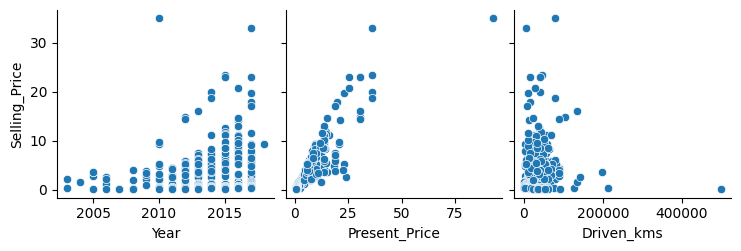

In [ ]:
# 2.1 Pair Plot
sns.pairplot(data, x_vars=['Year', 'Present_Price', 'Driven_kms'], y_vars='Selling_Price')
plt.show()

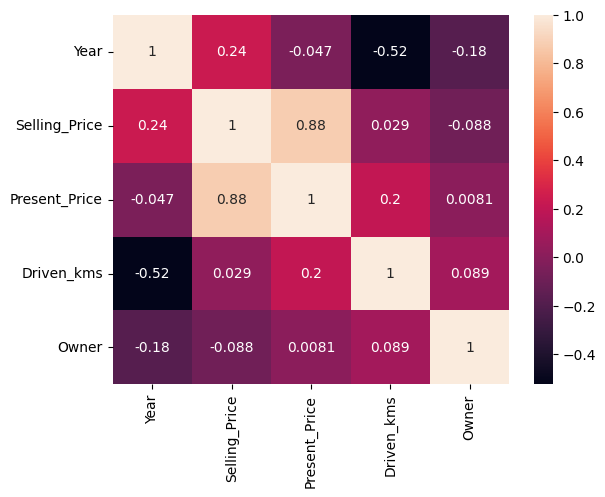

In [ ]:
# 2.2 Correlation Heatmap
# Exclude non-numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=['float', 'int'])
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

**Visualization**

1. sns.pairplot(data, x_vars=['Year', 'Present_Price', 'Driven_kms'], y_vars='Selling_Price'): Creates a pair plot, showing the relationships between specified features (Year, Present_Price, Driven_kms) and the target variable (Selling_Price).

2. sns.heatmap(numerical_data.corr(), annot=True): Generates a correlation heatmap, displaying the correlation coefficients between numerical features. annot=True adds the correlation values onto the heatmap.

**4. Data Preprocessing:**

In [ ]:
# 3.1 Handle Missing Values
data['Present_Price'].fillna(data['Present_Price'].mean(), inplace=True)

# 3.2 Encode Categorical Features
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Selling_type'] = label_encoder.fit_transform(data['Selling_type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

# 3.3 Remove Irrelevant Features
# Drop the 'Car_Name' column
data = data.drop('Car_Name', axis=1)

# 3.4 Feature Scaling
scaler = StandardScaler()
data[['Present_Price', 'Driven_kms']] = scaler.fit_transform(data[['Present_Price', 'Driven_kms']])

**Data Preprocessing:**


1.	data['Present_Price'].fillna(data['Present_Price'].mean(), inplace=True): Replaces missing values in the Present_Price column with the mean value of that column.
2.	label_encoder = LabelEncoder(): Creates an instance of LabelEncoder for converting categorical features into numerical representations.
3.	data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type']): Encodes the Fuel_Type column, converting categorical labels into numerical values.
4.	data = data.drop('Car_Name', axis=1): Removes the Car_Name column, likely assumed to be irrelevant for the prediction task.
5.	scaler = StandardScaler(): Creates an instance of StandardScaler for scaling features to have zero mean and unit variance.
6.	data[['Present_Price', 'Driven_kms']] = scaler.fit_transform(data[['Present_Price', 'Driven_kms']]): Scales the Present_Price and Driven_kms columns.



**5. Model Training and Evaluation:**

In [ ]:
# 4.1 Split Data into Training and Testing Sets
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Train and Evaluate Different Models

# 4.2.1 Random Forest
rf_model = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

# 4.2.2 Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)

# 4.2.3 Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression:")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)



Random Forest:
Mean Squared Error: 0.8407575702008715
R-squared: 0.9635017913498

Gradient Boosting:
Mean Squared Error: 0.7995919441530833
R-squared: 0.9652888363458376

Support Vector Regression:
Mean Squared Error: 24.392443501673473
R-squared: -0.05890273720591188


**Model Training and Evaluation**

1.	X = data.drop('Selling_Price', axis=1): Creates the feature matrix X by dropping the target column.
2.	y = data['Selling_Price']: Creates the target variable vector y.
3.	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Splits the data into training (80%) and testing (20%) sets using train_test_split. random_state=42 ensures consistent splitting for reproducibility.

**Model Training and Evaluation (Example - Random Forest):**

1.	rf_model = RandomForestRegressor(): Initializes a Random Forest regression model.
2.	param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}: Defines a grid of hyperparameters to search over.
3.	grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error'): Creates a GridSearchCV object to find the best combination of hyperparameters using 5-fold cross-validation.
4.	grid_search_rf.fit(X_train, y_train): Fits the GridSearchCV model to the training data.
5.	best_rf_model = grid_search_rf.best_estimator_: Retrieves the best performing Random Forest model from the grid search.
6.	y_pred_rf = best_rf_model.predict(X_test): Predicts the target values using the best Random Forest model on the test data.
7.	mse_rf = mean_squared_error(y_test, y_pred_rf): Calculates the mean squared error (MSE) for the Random Forest predictions.
8.	r2_rf = r2_score(y_test, y_pred_rf): Calculates the R-squared score for the Random Forest predictions.



**6. Visualizing Model Performance**

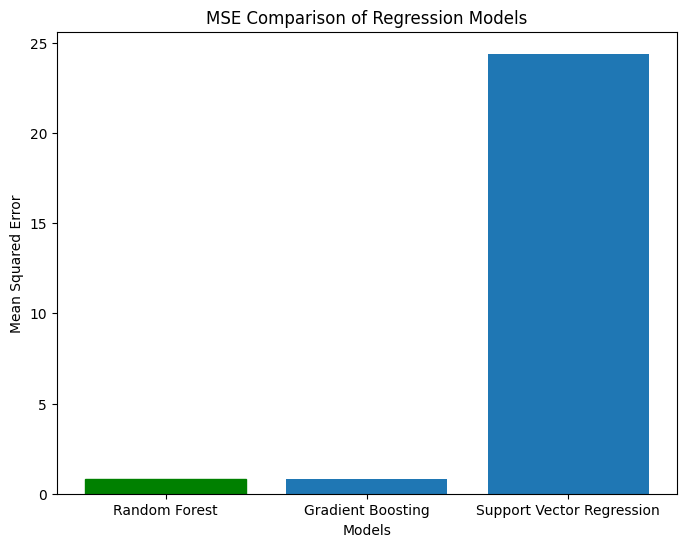

In [ ]:
# Visualizing Model Performance (Highlighting the Best Model)
models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression']

# Determine which model is best across both MSE and R-squared
best_model_across_metrics = None
if best_model_index_mse == best_model_index_r2:
   best_model_across_metrics = models[best_model_index_mse]

mse_scores = [mse_rf, mse_gb, mse_svr]
r2_scores = [r2_rf, r2_gb, r2_svr]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, mse_scores)
bars[best_model_index_mse].set_color('green')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison of Regression Models')
plt.show()


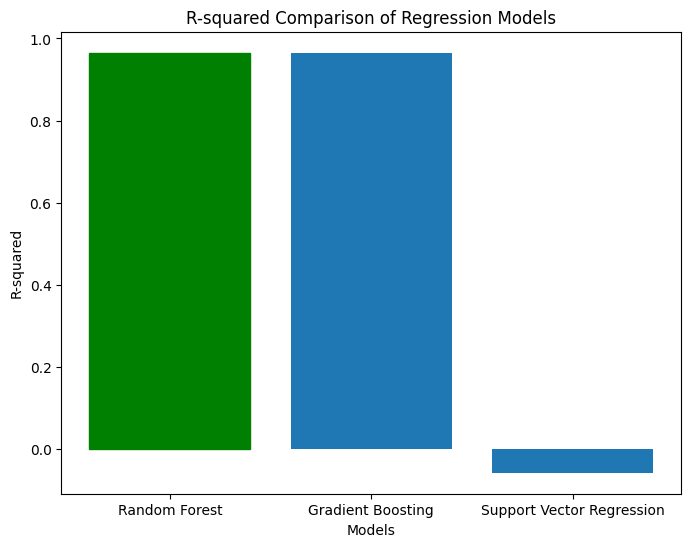

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.bar(models, r2_scores)
bars[best_model_index_r2].set_color('green')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Regression Models')
plt.show()



In [ ]:
# Print the best model across both metrics
if best_model_across_metrics:
  print(f"\nThe '{best_model_across_metrics}' model is the best across both MSE and R-squared.")
else:
  print("\nNo single model is the best across both MSE and R-squared.")


The 'Random Forest' model is the best across both MSE and R-squared.


**Explanation of the Visualization Code:**


1.	Data Preparation for Visualization:
a.	models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression'] : Creates a list of model names for labeling the chart.
b.	mse_scores = [mse_rf, mse_gb, mse_svr] : Collects the mean squared error (MSE) scores from each model.
c.	r2_scores = [r2_rf, r2_gb, r2_svr] : Collects the R-squared scores from each model.
2.	Bar Chart for MSE:
a.	plt.figure(figsize=(8, 6)) : Sets the figure size for the chart.
b.	plt.bar(models, mse_scores) : Creates a bar chart where the x-axis represents the models, and the y-axis represents the MSE values.
c.	plt.xlabel('Models') : Sets the label for the x-axis.
d.	plt.ylabel('Mean Squared Error') : Sets the label for the y-axis.
e.	plt.title('MSE Comparison of Regression Models') : Sets the title for the chart.
f.	plt.show() : Displays the bar chart.
3.	Bar Chart for R-squared:
a.	The code for the R-squared bar chart is very similar to the MSE bar chart, just changing the y-axis label and title.

4. **Identifying the Best Model:**
best_model_index = np.argmin(mse_scores): This line finds the index of the model with the lowest MSE score in the mse_scores list.
best_model = models[best_model_index] : This line retrieves the name of the best model using the index found in the previous step.

5. **Highlighting the Best Model in the Charts:**
bars = plt.bar(models, mse_scores): This line creates the bar chart as before, but it also stores the created bar objects in the bars variable.
bars[best_model_index].set_color('green'): This line specifically sets the color of the bar corresponding to the best model (identified by best_model_index) to green.
This code is repeated for both the MSE and R-squared charts to highlight the best model in each visualization.

**How the Visualization Helps:**

1.	Direct Comparison: The bar charts allow you to visually compare the performance of the three models (Random Forest, Gradient Boosting, and Support Vector Regression) directly side by side.
2.	Easy Interpretation: The bar heights clearly show which model has the lowest MSE (better in terms of minimizing prediction errors) and the highest R-squared (better in terms of explaining the variance in the data).
3.	Informed Decision: This visualization helps you make an informed decision about which model is best suited for your car price prediction task, based on the specific criteria you've defined.



**OUT PUT Results**



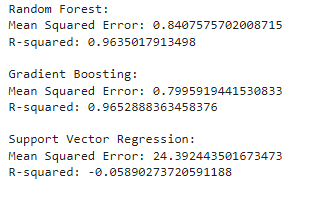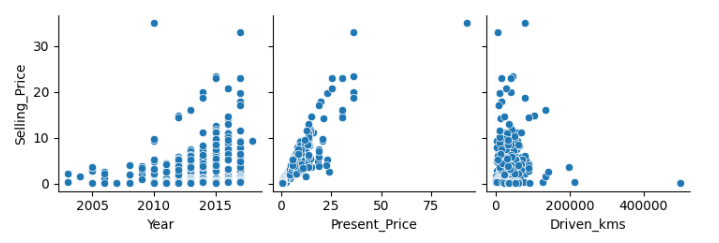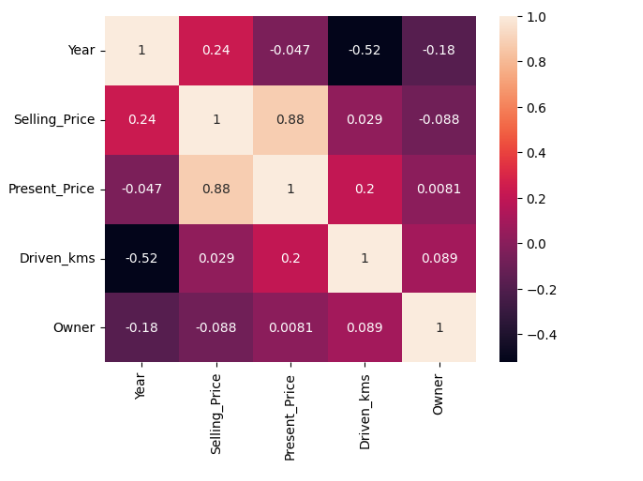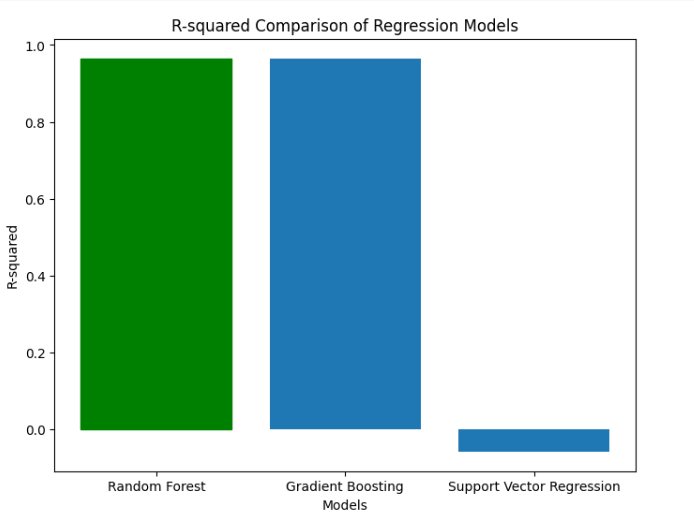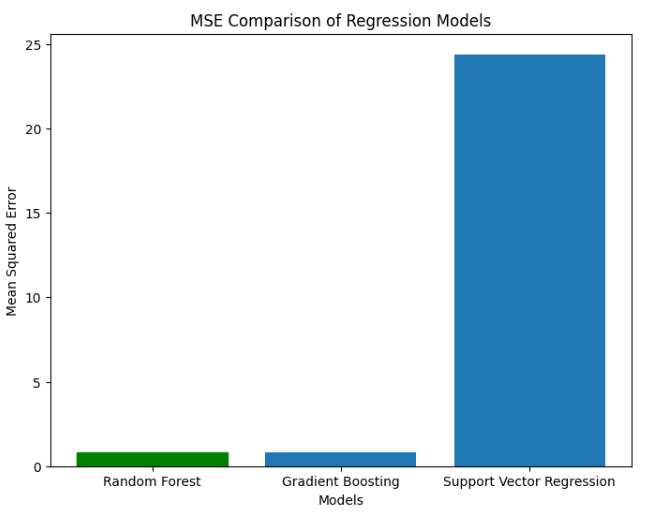

**FULL CODE**

---



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 

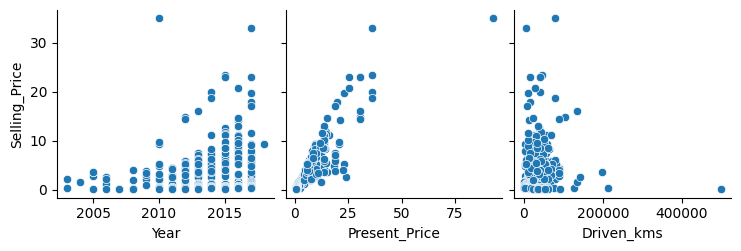

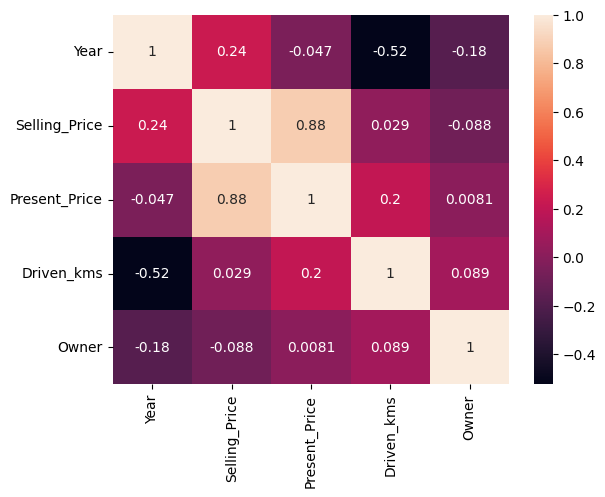


Random Forest:
Mean Squared Error: 0.7444701814754106
R-squared: 0.9676817325464581

Gradient Boosting:
Mean Squared Error: 0.802074975058442
R-squared: 0.965181045249711

Support Vector Regression:
Mean Squared Error: 24.392443501673473
R-squared: -0.05890273720591188


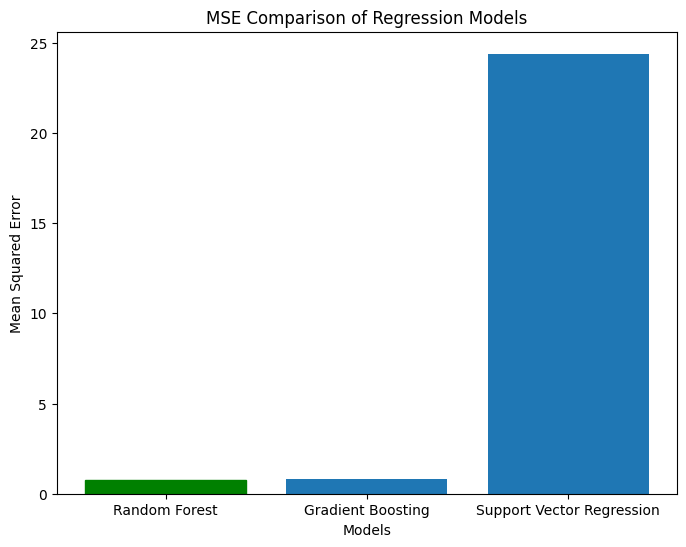

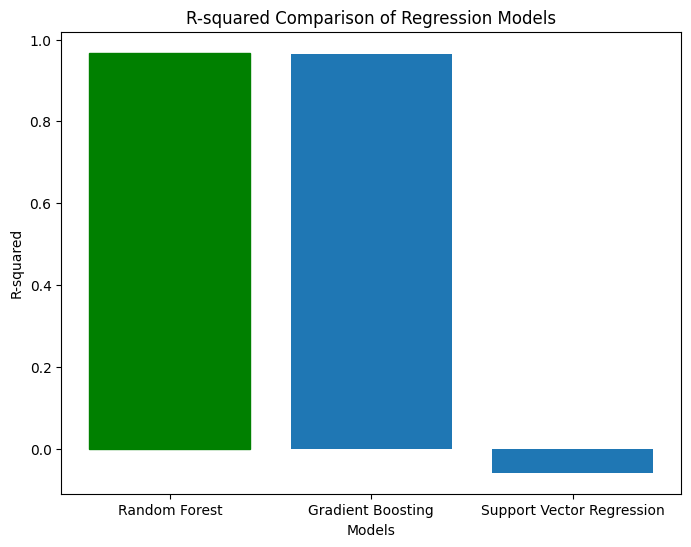


The 'Random Forest' model is the best across both MSE and R-squared.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you are running this code in a Google Colab environment
from google.colab import drive
drive.mount('/content/drive')

# 1. Load and Explore Data
data = pd.read_csv('/content/drive/MyDrive/Dataset/car data.csv')
print(data.head())
print(data.info())
print(data.describe())

# 2. Visualize Data
sns.pairplot(data, x_vars=['Year', 'Present_Price', 'Driven_kms'], y_vars='Selling_Price')
plt.show()

numerical_data = data.select_dtypes(include=['float', 'int'])
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

# 3. Data Preprocessing
# 3.1 Handle Missing Values (if any)
data['Present_Price'].fillna(data['Present_Price'].mean(), inplace=True)

# 3.2 Encode Categorical Features
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Selling_type'] = label_encoder.fit_transform(data['Selling_type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

# 3.3 Remove Irrelevant Features
data = data.drop('Car_Name', axis=1)

# 3.4 Feature Scaling
scaler = StandardScaler()
data[['Present_Price', 'Driven_kms']] = scaler.fit_transform(data[['Present_Price', 'Driven_kms']])

# 4. Model Building and Evaluation
# 4.1 Split Data
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Train and Evaluate Models
# 4.2.1 Random Forest
rf_model = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

# 4.2.2 Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("\nGradient Boosting:")
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)

# 4.2.3 Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("\nSupport Vector Regression:")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)

# 5. Model Comparison and Selection
mse_scores = [mse_rf, mse_gb, mse_svr]
r2_scores = [r2_rf, r2_gb, r2_svr]

best_model_index_mse = np.argmin(mse_scores)
best_model_index_r2 = np.argmax(r2_scores)

# 6. Visualize Model Performance
models = ['Random Forest', 'Gradient Boosting', 'Support Vector Regression']

# Determine if a single model is best across both metrics
best_model_across_metrics = None
if best_model_index_mse == best_model_index_r2:
   best_model_across_metrics = models[best_model_index_mse]


plt.figure(figsize=(8, 6))
bars = plt.bar(models, mse_scores)
bars[best_model_index_mse].set_color('green')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison of Regression Models')
plt.show()

plt.figure(figsize=(8, 6))
bars = plt.bar(models, r2_scores)
bars[best_model_index_r2].set_color('green')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Regression Models')
plt.show()

# Print the best model across both metrics
if best_model_across_metrics:
  print(f"\nThe '{best_model_across_metrics}' model is the best across both MSE and R-squared.")
else:
  print("\nNo single model is the best across both MSE and R-squared.")

**End of 3 Tasks**

---



# **TASK 4:EMAIL SPAM DETECTION WITH MACHINE LEARNING**

**Question ?????......** Weve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Lets get started!

**1. Importing Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**Explaination Importing Libraries**

1.	pandas as pd: For data manipulation and analysis (loading, cleaning, etc.).
2.	sklearn.model_selection import train_test_split: For splitting data into training and testing sets.
3.	sklearn.feature_extraction.text import TfidfVectorizer: For transforming text data into numerical features using TF-IDF.
4.	sklearn.naive_bayes import MultinomialNB: To build a Naive Bayes model, suitable for text classification.
5.	sklearn.pipeline import Pipeline: To create a workflow for preprocessing and modeling steps.
6.	sklearn.model_selection import GridSearchCV: For hyperparameter tuning using cross-validation.
7.	nltk: The Natural Language Toolkit for text processing tasks.
8.	re: For regular expressions, useful for cleaning text data.
9.	nltk.corpus import stopwords: To remove common words (like "the," "a," "is") that don't contribute much to meaning.
10.	nltk.stem import PorterStemmer: To reduce words to their root forms (e.g., "running" becomes "run").
11.	seaborn as sns: For creating aesthetically pleasing visualizations (like heatmaps).
12.	matplotlib.pyplot as plt: For plotting graphs and charts.
13.	wordcloud import WordCloud: To generate word clouds for visualizing the most frequent words.
14.	sklearn.metrics import confusion_matrix, accuracy_score, classification_report: For evaluating the model's performance.
15.	google.colab import drive: For accessing Google Drive (used to load the data).



**2. Downloading NLTK Resources**

In [ ]:
# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Explaination ofDownloading NLTK Resources**

nltk.download('stopwords') and nltk.download('punkt'): These download necessary NLTK resources, including the list of stopwords and the Punkt sentence tokenizer, which are needed for text processing.

**3. Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Explaination of Mounting Google Drive**


drive.mount('/content/drive'): This allows you to access the dataset stored on your Google Drive

**4. Loading and Exploring the Dataset**

In [ ]:
# 1. Load and Explore the Dataset
file_path = ('/content/drive/MyDrive/Dataset/spam.csv')
data = pd.read_csv(file_path, encoding='latin-1')
# Print original column names for inspection
print("Original Column Names:", data.columns)

# Drop unnecessary columns if needed, or rename all columns
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
# Alternatively, rename all columns:
# data.columns = ['label', 'text', 'col3', 'col4', 'col5']  # Replace 'col3', 'col4', 'col5' with actual names if needed

# Correctly rename the remaining columns if you dropped some
data.columns = ['label', 'text']

print(data.head())

Original Column Names: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


**Explaination Loading and Exploring the Dataset**


1.	file_path = ('/content/drive/MyDrive/Dataset/spam.csv'): Sets the path to your CSV file containing the email data.
2.	data = pd.read_csv(file_path, encoding='latin-1'): Loads the dataset into a Pandas DataFrame, using 'latin-1' encoding to handle potential character encoding issues.
3.	print("Original Column Names:", data.columns): Displays the original column names for inspection.
4.	data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']): Drops unnecessary columns if present.
5.	data.columns = ['label', 'text']: Renames the columns to 'label' (spam/ham) and 'text'.
6.	print(data.head()): Shows the first few rows of the data for a quick look.



**5. Preprocessing Text Data**

In [ ]:
# 2. Preprocess the Text Data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['text'].apply(preprocess_text)
print("\nProcessed Data:")
print(data.head())


Processed Data:
  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                      processed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


**Explaination of Preprocessing Text Data**


1.	stop_words = set(stopwords.words('english')): Creates a set of English stop words.
2.	stemmer = PorterStemmer(): Initializes a PorterStemmer object for stemming words.
3.	def preprocess_text(text):: Defines a function to preprocess each email:
o	text = text.lower(): Converts text to lowercase.
o	text = re.sub(r'[^a-zA-Z\s]', '', text): Removes punctuation using regular expressions.
o	words = nltk.word_tokenize(text): Splits the text into individual words.
o	words = [stemmer.stem(word) for word in words if word not in stop_words]: Stems each word and removes stop words.
o	return ' '.join(words): Joins the processed words back into a string.
4.	data['processed_text'] = data['text'].apply(preprocess_text): Applies the preprocess_text function to each email in the 'text' column and stores the result in a new 'processed_text' column.
5.	print("\nProcessed Data:"): Prints the first few rows of the data with the preprocessed text.



**6. Feature Extraction (TF-IDF)**

In [ ]:
# 3. Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)

**Explaination Feature Extraction (TF-IDF)**

vectorizer = TfidfVectorizer(max_features=5000): Creates a TF-IDF vectorizer, which will consider the top 5000 most frequent words in the dataset when converting text into numerical features.

**7. Train-Test Split**

In [ ]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['label'], test_size=0.2, random_state=42)

**Explaination Train - Test Split**

X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['label'], test_size=0.2, random_state=42): Splits the data into training and testing sets (80% for training, 20% for testing). random_state=42 ensures consistent splitting across runs.

**8. Model Training (Grid Search with Cross-Validation)**

In [ ]:
# 5. Model Training (Grid Search with Cross-Validation)
# Define the model and its hyperparameters
model = MultinomialNB()  # Use Multinomial Naive Bayes

param_grid = {
    'model__alpha': [0.1, 1, 10]  # Hyperparameters for Multinomial Naive Bayes
}

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', model)
])

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its accuracy
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('model', MultinomialNB(alpha=0.1))])
Best Accuracy: 0.9798057807773801


**Explaination 8. Model Training (Grid Search with Cross-Validation)**

1.	model = MultinomialNB(): Defines a Multinomial Naive Bayes model.
2.	param_grid = { 'model__alpha': [0.1, 1, 10] }: Specifies the hyperparameters to tune (the smoothing parameter 'alpha' for Naive Bayes).
3.	pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features=5000)), ('model', model)]): Creates a pipeline that first applies TF-IDF and then trains the Naive Bayes model.
4.	grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy'): Initializes a GridSearchCV object to find the best hyperparameters using 5-fold cross-validation.
5.	grid_search.fit(X_train, y_train): Trains the model on the training data.
6.	best_model = grid_search.best_estimator_: Retrieves the best performing model from the grid search.
7.	best_accuracy = grid_search.best_score_: Gets the accuracy of the best model.



**9. Model Evaluation**

In [ ]:
# 6. Model Evaluation
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9838565022421525


**Explaination Model Evaluation**

•	y_pred = best_model.predict(X_test): Predicts the labels (spam/ham) for the test data.

•	accuracy = accuracy_score(y_test, y_pred): Calculates the accuracy of the model.

•	print("Accuracy:", accuracy): Prints the accuracy.


**10. Visualizations**

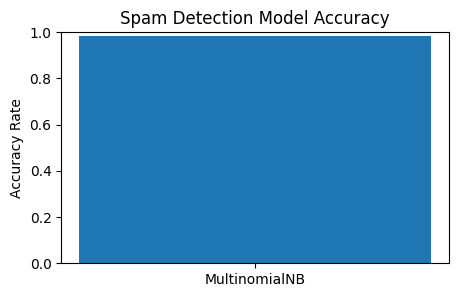

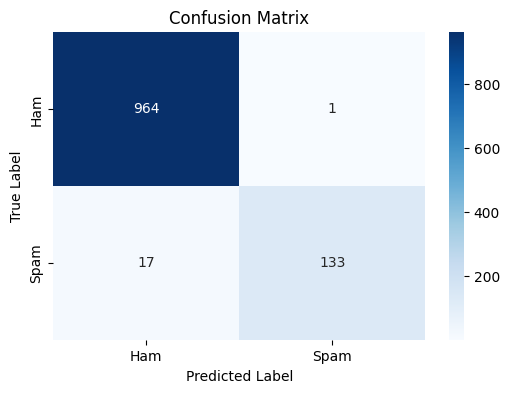

Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# Visualization: Accuracy Bar Chart with Model Name
model_name = type(best_model['model']).__name__  # Get the model name
plt.figure(figsize=(5, 3))
plt.bar([model_name], [accuracy])
plt.ylabel('Accuracy Rate')
plt.title('Spam Detection Model Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 (for percentage)
plt.show()

# Visualization 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print(classification_report(y_test, y_pred))

**Explaination Visualizations**

•	Accuracy Bar Chart: Plots a bar chart showing the accuracy of the best model.

•	Confusion Matrix: Creates a heatmap to visualize how well the model predicts spam and ham.

•	Classification Report: Prints a report with precision, recall, F1-score, and support for each class (spam and ham).



**11. Test with New Email**

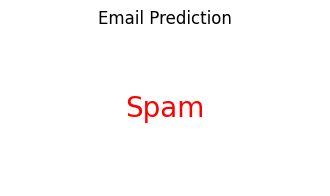

In [ ]:
# 7. Test with New Email
new_email = ["Congratulations! You've won a free vacation to the Bahamas!"]
prediction = best_model.predict(new_email)

# Visualization 2: Prediction Result
if prediction[0] == 'spam':
    result = "Spam"
    color = 'red'
else:
    result = "Ham"
    color = 'green'

plt.figure(figsize=(4, 2))
plt.text(0.5, 0.5, result, ha='center', va='center', fontsize=20, color=color)
plt.axis('off')
plt.title('Email Prediction')
plt.show()

**Explaination Test with New Email**

1.	new_email = ["Congratulations! You've won a free vacation to the Bahamas!"]: Creates a new email to test the model.
2.	prediction = best_model.predict(new_email): Predicts the class (spam/ham) of the new email.
3.	if prediction[0] == 'spam':: Checks the prediction and displays a result accordingly.


**12. Word Clouds**

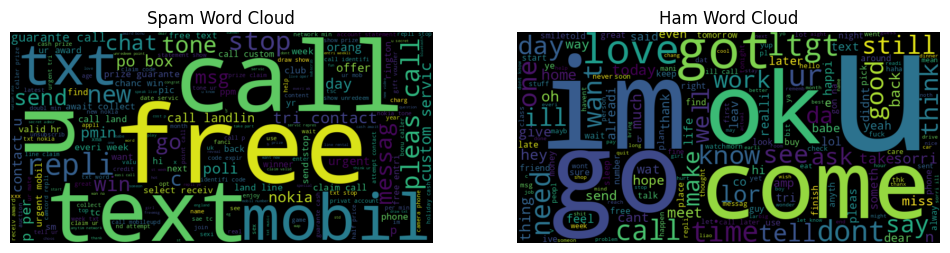

In [ ]:
# Create word clouds for spam and ham
spam_words = ' '.join(data[data['label'] == 'spam']['processed_text'])
ham_words = ' '.join(data[data['label'] == 'ham']['processed_text'])

spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_words)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()

**Explaination  Word Clouds**


Creates word clouds to visualize the most common words in spam and ham emails. This helps to understand the patterns in the data.

---



**Out Put results **


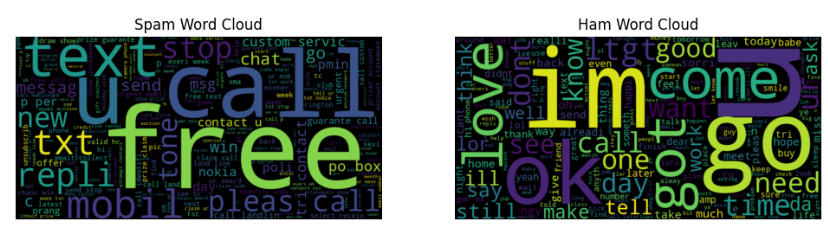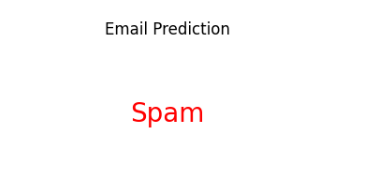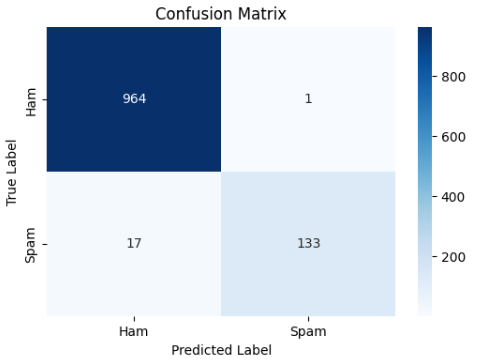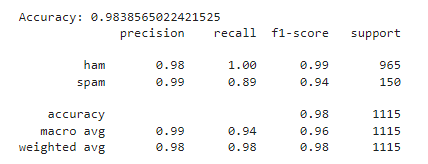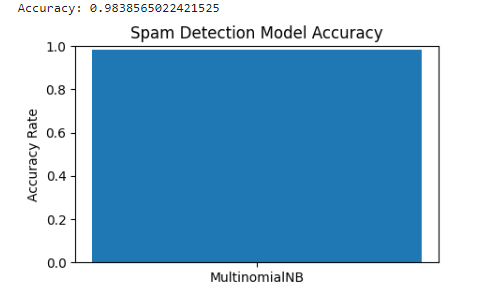

**FULL CODE**

---



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original Column Names: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Processed Data:
  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                          

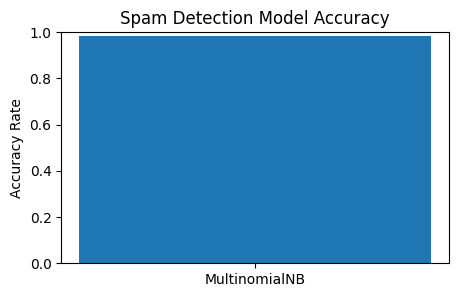

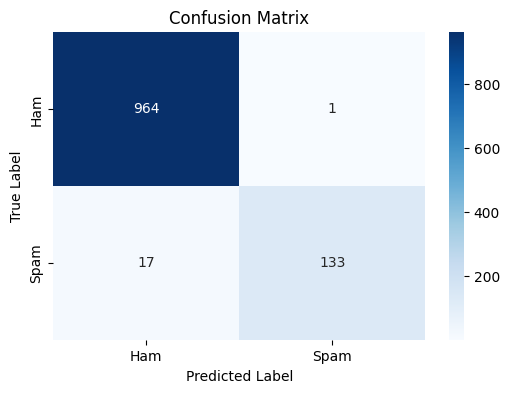

Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



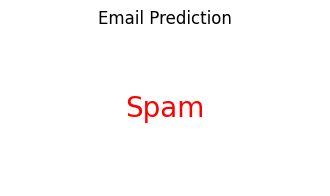

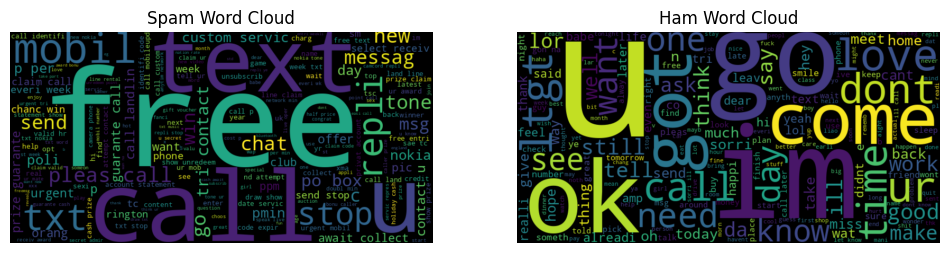

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')

from google.colab import drive
drive.mount('/content/drive')

# 1. Load and Explore the Dataset
file_path = ('/content/drive/MyDrive/Dataset/spam.csv')
data = pd.read_csv(file_path, encoding='latin-1')
# Print original column names for inspection
print("Original Column Names:", data.columns)

# Drop unnecessary columns if needed, or rename all columns
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
# Alternatively, rename all columns:
# data.columns = ['label', 'text', 'col3', 'col4', 'col5']  # Replace 'col3', 'col4', 'col5' with actual names if needed

# Correctly rename the remaining columns if you dropped some
data.columns = ['label', 'text']

print(data.head())

# 2. Preprocess the Text Data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['processed_text'] = data['text'].apply(preprocess_text)
print("\nProcessed Data:")
print(data.head())

# 3. Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['label'], test_size=0.2, random_state=42)

# 5. Model Training (Grid Search with Cross-Validation)
# Define the model and its hyperparameters
model = MultinomialNB()  # Use Multinomial Naive Bayes

param_grid = {
    'model__alpha': [0.1, 1, 10]  # Hyperparameters for Multinomial Naive Bayes
}

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('model', model)
])

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its accuracy
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

# 6. Model Evaluation
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualization: Accuracy Bar Chart with Model Name
model_name = type(best_model['model']).__name__  # Get the model name
plt.figure(figsize=(5, 3))
plt.bar([model_name], [accuracy])
plt.ylabel('Accuracy Rate')
plt.title('Spam Detection Model Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 (for percentage)
plt.show()

# Visualization 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print(classification_report(y_test, y_pred))

# 7. Test with New Email
new_email = ["Congratulations! You've won a free vacation to the Bahamas!"]
prediction = best_model.predict(new_email)

# Visualization 2: Prediction Result
if prediction[0] == 'spam':
    result = "Spam"
    color = 'red'
else:
    result = "Ham"
    color = 'green'

plt.figure(figsize=(4, 2))
plt.text(0.5, 0.5, result, ha='center', va='center', fontsize=20, color=color)
plt.axis('off')
plt.title('Email Prediction')
plt.show()

# Create word clouds for spam and ham
spam_words = ' '.join(data[data['label'] == 'spam']['processed_text'])
ham_words = ' '.join(data[data['label'] == 'ham']['processed_text'])

spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_words)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()

# **TASK 5:SALES PREDICTION USING PYTHON**


**Question ??? ....**Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So lets start the task of sales prediction with machine learning using Python.

**FULL CODE**

---



**1. Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Explaination Import Libraries**

1)	Data Handling and Visualization:
a)	pandas is used for data manipulation and analysis.

b)	matplotlib.pyplot is used for creating visualizations.

2)	Machine Learning:

a)	sklearn.model_selection.train_test_split: Splits data for model training and testing.

b)	sklearn.linear_model.LinearRegression: Implements linear regression.

c)	sklearn.metrics.mean_squared_error, sklearn.metrics.r2_score: Calculate model performance metrics.

d)	sklearn.preprocessing.StandardScaler: Scales features to a standard range.

e)	sklearn.tree.DecisionTreeRegressor: Implements decision tree regression.

f)	sklearn.ensemble.RandomForestRegressor: Implements random forest regression.

g)	sklearn.svm.SVR: Implements support vector regression.

h)	sklearn.neighbors.KNeighborsRegressor: Implements K-nearest neighbors regression.

i)	xgboost.XGBRegressor: Implements XGBoost regression.

3)	Google Colab:

a)	google.colab.drive: Used to mount Google Drive for accessing data.



**2. Load and Explore Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Advertising.csv")

print(df.head())
print(df.info())
print(df.describe())

plt.figure(figsize=(12, 4))

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

**Explaination Load and Explore Data**

•	This section loads the advertising dataset (Advertising.csv) from Google Drive.

•	df.head(): Displays the first few rows of the dataset.

•	df.info(): Provides information about the data types and missing values.

•	df.describe(): Shows descriptive statistics (mean, standard deviation, etc.) of the dataset.

•	The scatter plot code (explained next) visualizes the relationships between advertising spending and sales.



**3. Scatter Plots for Visualization**

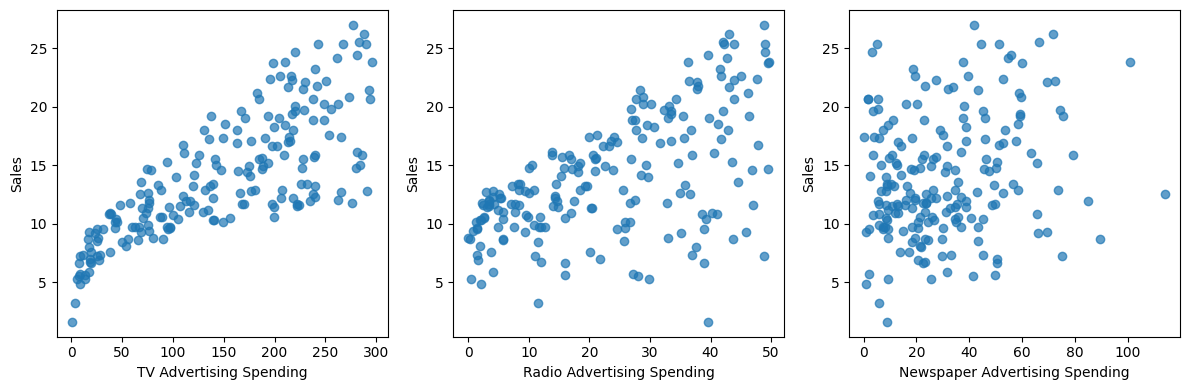

In [ ]:
# Scatter plots for each feature vs. Sales
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'], alpha=0.7)
plt.xlabel("TV Advertising Spending")
plt.ylabel("Sales")

plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'], alpha=0.7)
plt.xlabel("Radio Advertising Spending")
plt.ylabel("Sales")

plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'], alpha=0.7)
plt.xlabel("Newspaper Advertising Spending")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()

**Explaination Scatter Plots for Visualization**


1)	This section creates scatter plots to visualize the relationship between each advertising channel ('TV', 'Radio', 'Newspaper') and 'Sales'.

a)	plt.subplot(1, 3, 1): Creates a grid for 3 plots (1 row, 3 columns), selecting the first plot.

b)	plt.scatter(...): Plots the scatter plot with transparency (alpha=0.7).

c)	plt.xlabel, plt.ylabel, plt.title: Sets labels and titles for clarity.

d)	plt.tight_layout(): Adjusts plot spacing to prevent overlapping.

e)	plt.show(): Displays the plots.




**4. Data Preparation**

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

#Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Explaination  Data Preparation**

1)	Feature and Target Selection:

a)	X = df[['TV', 'Radio', 'Newspaper']]: Selects advertising channels as features (independent variables).

b)	y = df['Sales']: Selects 'Sales' as the target variable (what we want to predict).


2)	Feature Scaling:

a)	scaler = StandardScaler(): Initializes a StandardScaler to standardize the features.

b)	X = scaler.fit_transform(X): Fits the scaler to the data and transforms the features.


3)	Data Splitting:

a)	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): Splits the data into training (80%) and testing (20%) sets with a fixed random state for reproducibility.



**5. Model Building, Training & Model Evaluation**

In [ ]:

# Model Building and Training (Multiple Models)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}



**Explaination  Model Building, Training & Model Evaluation**


1)	Model Initialization:

a)	This section initializes a dictionary models where keys are model names and values are instances of the model classes.


2)	Model Training Loop:

a)	The for loop iterates through each model in the models dictionary:

i)	model.fit(X_train, y_train): Trains the current model using the training data.


3)	Model Prediction:

a)	y_pred = model.predict(X_test): Makes predictions on the test data using the trained model.


4)	Performance Evaluation:

a)	mse = mean_squared_error(y_test, y_pred): Calculates the mean squared error between actual (y_test) and predicted (y_pred) values.

b)	r2 = r2_score(y_test, y_pred): Calculates the R-squared score, indicating the goodness of fit of the model.


5)	Printing Results:

a)	Prints the model name, mean squared error, and R-squared score for each trained model.




**6. Visualizing Predicted vs. Actual Sales**


--- Linear Regression ---
Mean Squared Error: 3.1740973539761064
R-squared: 0.8994380241009119

--- Decision Tree ---
Mean Squared Error: 1.4737500000000001
R-squared: 0.9533085487136584

--- Random Forest ---
Mean Squared Error: 0.5160191500000015
R-squared: 0.9836514449499274

--- Support Vector Machine ---
Mean Squared Error: 2.7739508306858562
R-squared: 0.9121154944314331

--- K-Nearest Neighbors ---
Mean Squared Error: 2.01054
R-squared: 0.936301930131134

--- XGBoost ---
Mean Squared Error: 0.8689325216764425
R-squared: 0.9724704186551494


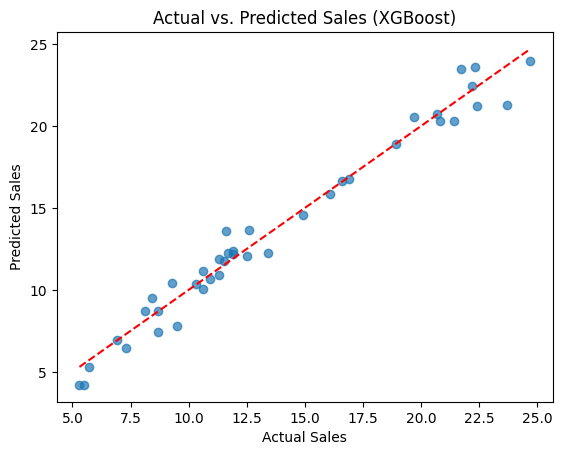

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- {name} ---")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

# Visualize predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Actual vs. Predicted Sales ({name})")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.show()

**Visualizing Predicted vs. Actual Sales**


1)	Scatter Plot:

a)	Creates a scatter plot comparing actual sales (y_test) on the x-axis to predicted sales (y_pred) on the y-axis.


2)	Reference Line:

a)	plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red'): Plots a dashed red line representing a perfect prediction (where predicted values perfectly match actual values).


3)	Labels and Title:

a)	Sets appropriate labels and titles to the plot for clarity.



**7. Example Prediction**

In [ ]:
# Example Prediction (using Linear Regression for example)
new_data = pd.DataFrame({'TV': [100], 'Radio': [25], 'Newspaper': [15]})
new_data = scaler.transform(new_data)
predicted_sales = models["Linear Regression"].predict(new_data)
print("\nPredicted Sales for new data (Linear Regression):", predicted_sales[0])


Predicted Sales for new data (Linear Regression): 12.223312155974188


**Explaination Example Prediction**

1)	Creating New Data:

a)	Creates a DataFrame new_data with hypothetical advertising spending values.

2)	Feature Scaling:

a)	Applies the same feature scaling (scaler.transform) used on the training data to ensure consistency.

3)	Making a Prediction:

a)	Uses the trained "Linear Regression" model to predict sales for the new data.

4)	Printing the Prediction:

a)	Prints the predicted sales value for the provided advertising spending scenario.



**OUT PUT Results**



---









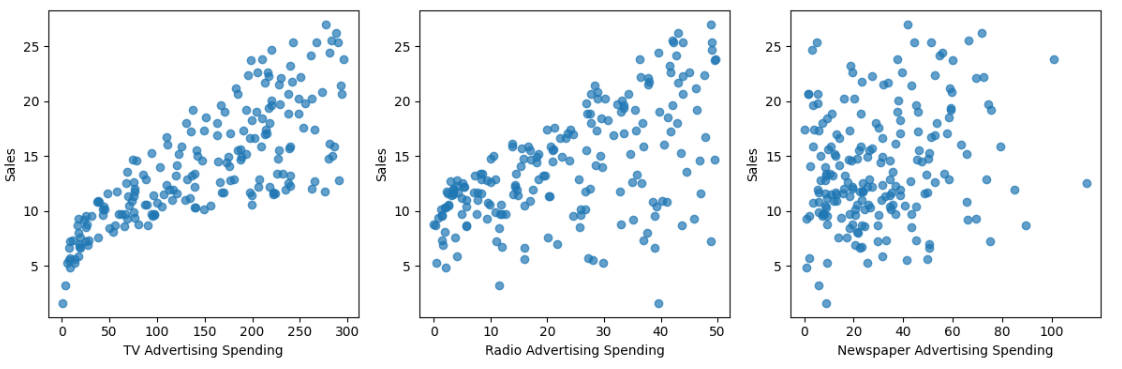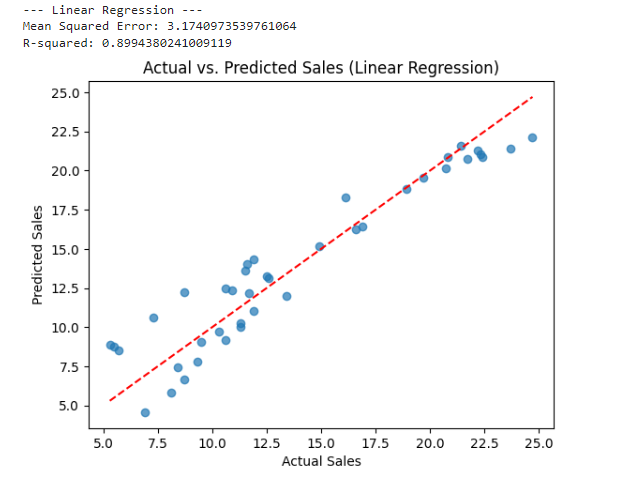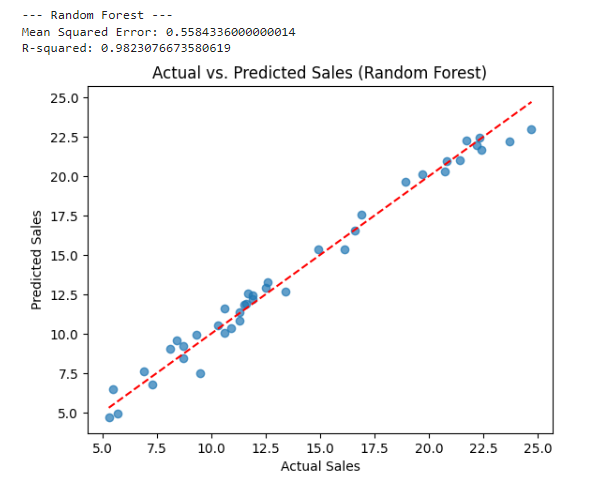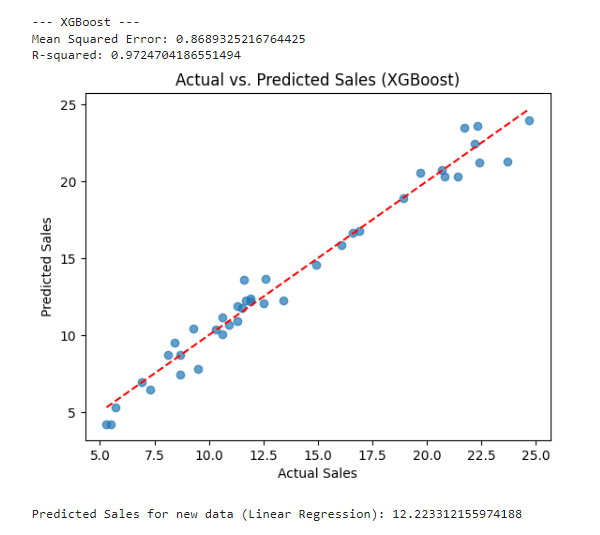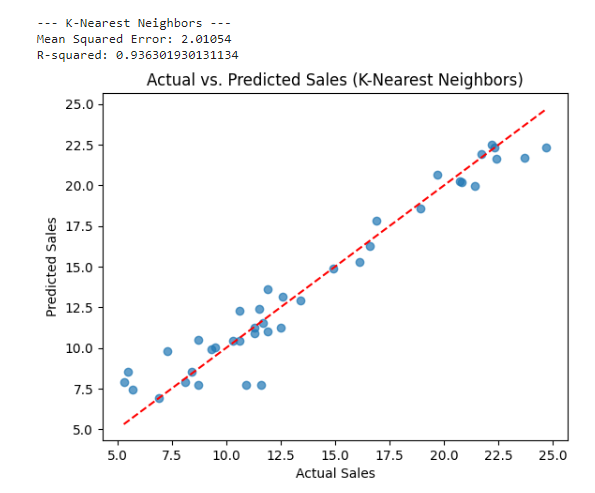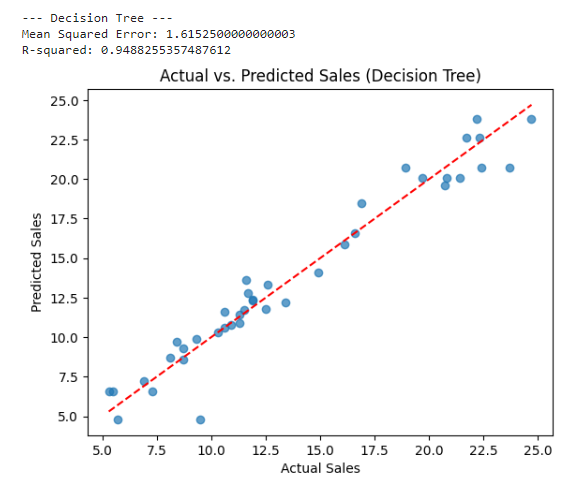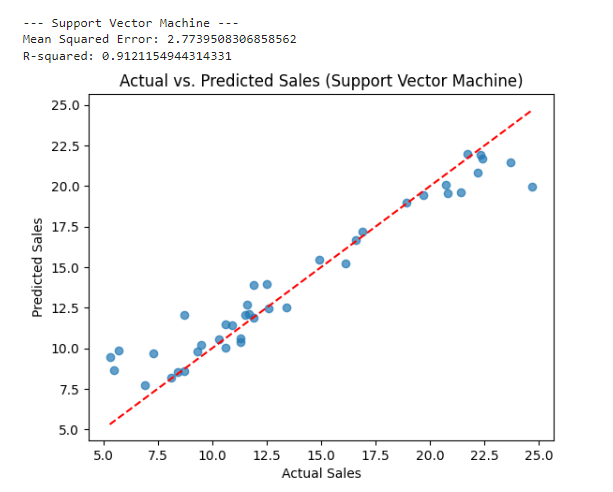



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000

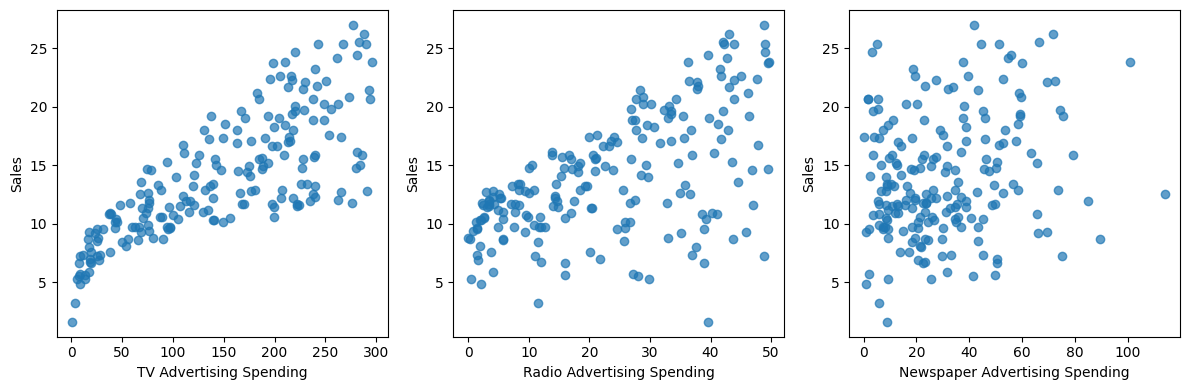


--- Linear Regression ---
Mean Squared Error: 3.1740973539761064
R-squared: 0.8994380241009119


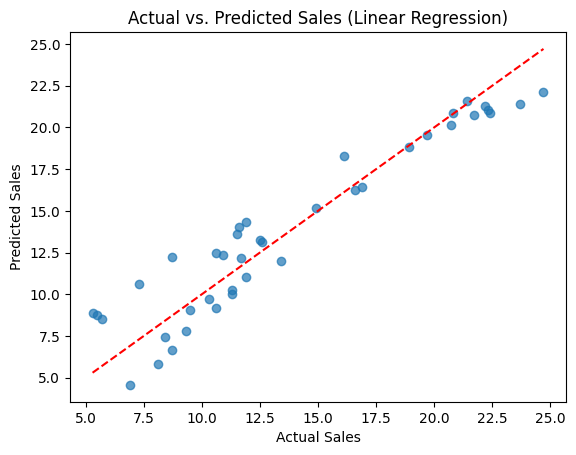


--- Decision Tree ---
Mean Squared Error: 1.8052499999999998
R-squared: 0.9428059423683338


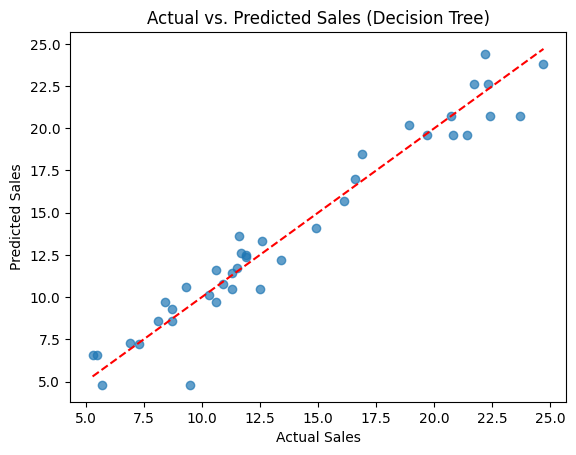


--- Random Forest ---
Mean Squared Error: 0.5076748250000013
R-squared: 0.9839158104422123


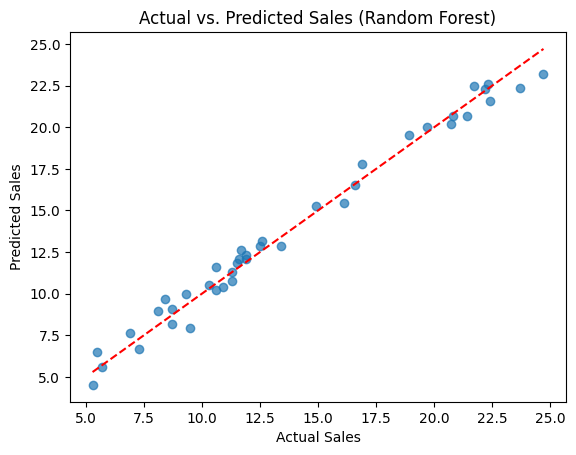


--- Support Vector Machine ---
Mean Squared Error: 2.7739508306858562
R-squared: 0.9121154944314331


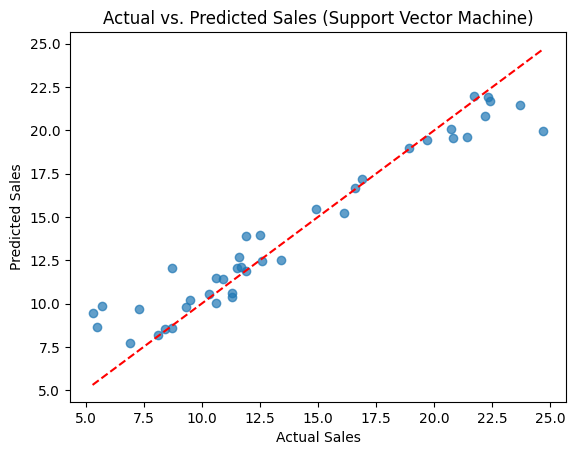


--- K-Nearest Neighbors ---
Mean Squared Error: 2.01054
R-squared: 0.936301930131134


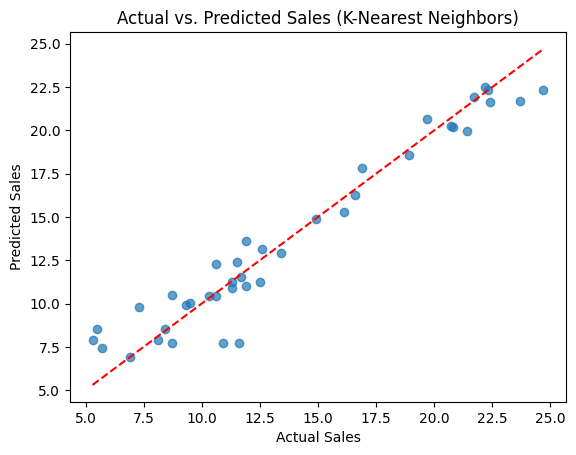


--- XGBoost ---
Mean Squared Error: 0.8689325216764425
R-squared: 0.9724704186551494


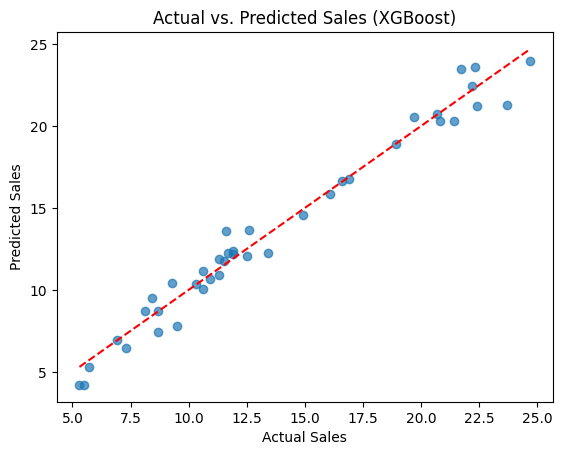


Predicted Sales for new data (Linear Regression): 12.223312155974188


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from google.colab import drive
drive.mount('/content/drive')

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/Advertising.csv")

# Data Exploration (with visualizations)
print(df.head())
print(df.info())
print(df.describe())

# Scatter plots for each feature vs. Sales
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'], alpha=0.7)
plt.xlabel("TV Advertising Spending")
plt.ylabel("Sales")

plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'], alpha=0.7)
plt.xlabel("Radio Advertising Spending")
plt.ylabel("Sales")

plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'], alpha=0.7)
plt.xlabel("Newspaper Advertising Spending")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()

# Data Preparation
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building and Training (Multiple Models)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- {name} ---")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Visualize predicted vs. actual values
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"Actual vs. Predicted Sales ({name})")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.show()

# Example Prediction (using Linear Regression for example)
new_data = pd.DataFrame({'TV': [100], 'Radio': [25], 'Newspaper': [15]})
new_data = scaler.transform(new_data)
predicted_sales = models["Linear Regression"].predict(new_data)
print("\nPredicted Sales for new data (Linear Regression):", predicted_sales[0])

**END OF 5th TASK**

---

